# Project - Time Series Forecasting (Rose Wine)

### Basic python packages loaded

In [1]:
##Import the requred libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

# Problem Statement 2:

The data of Rose wine sales in the 20th century is to be analysed. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Rose.csv

### Data Ingestion:

### 1. Read the data as an appropriate Time Series data and plot the data.


In [2]:
#Creating pandas df
df = pd.read_csv("Rose.csv",parse_dates = True, index_col = 0)

In [3]:
# Check top few records to get a feel of the data structure
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

### Exploratory Data Analysis:

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [4]:
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

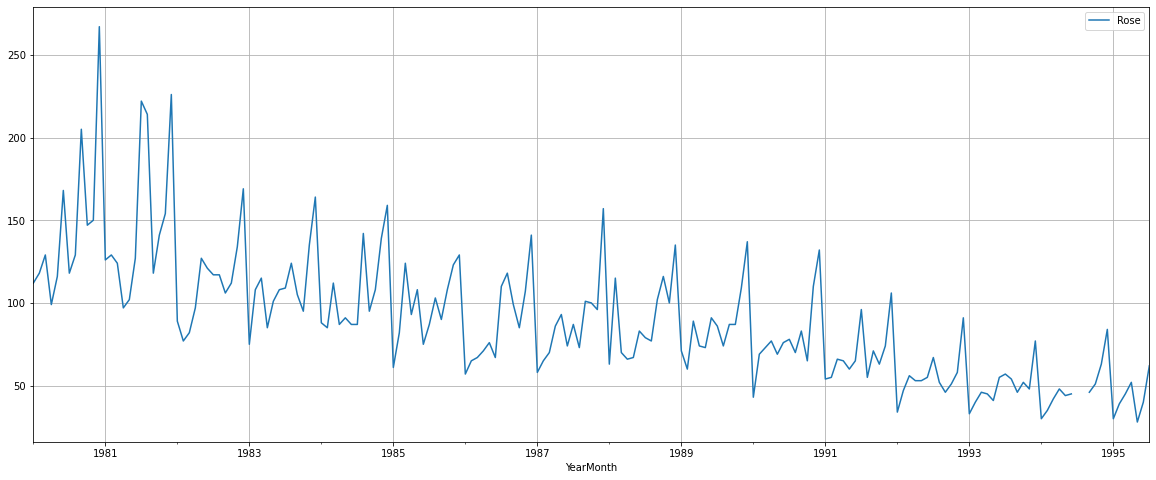

In [5]:
df.plot()
plt.grid();

We can see there is down trend and seasonal pattern both associated with it.

In [6]:
# Checks the number of rows and columns
row, col = df.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 187 rows and 1 columns in the dataset


In [139]:
# Checking the basic measures of descriptive statistics
df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

#### Inference:
The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

In [8]:
#Data type of data features
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
# Checks if any value in the dataframe is null.
a = df.isnull().values.sum()
print("There are {}" .format(a), "null values present in the dataset")

There are 2 null values present in the dataset


### Inference:
- No missing data is allowed in time series as data is ordered.
- It is simply not possible to shift the series to fill in the gaps.

Hence we need to do interpolation.

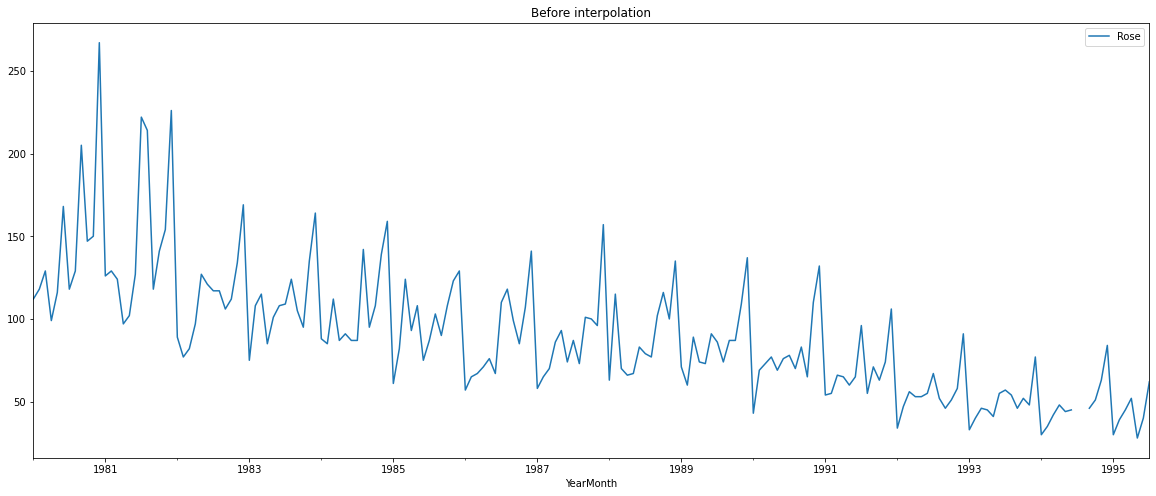

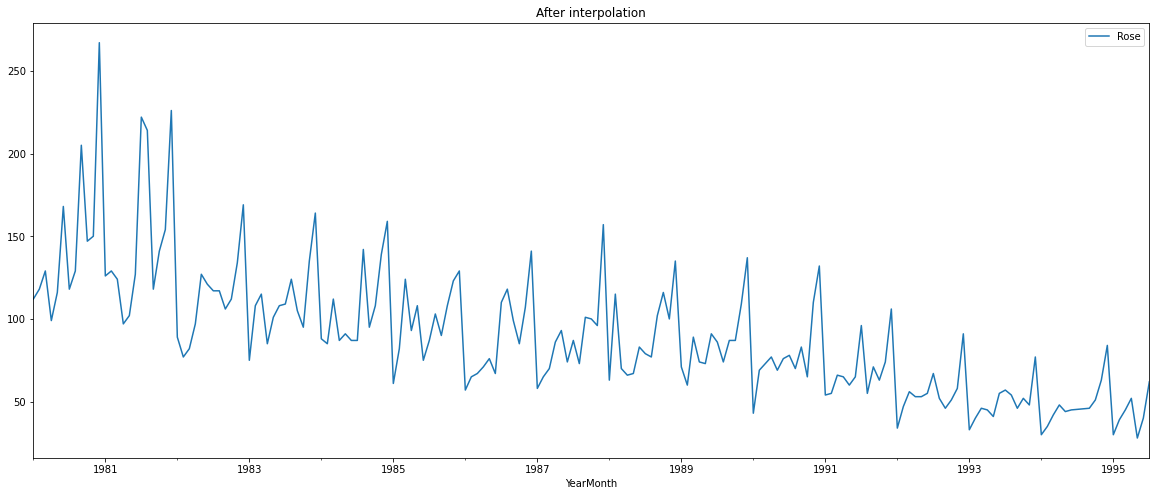

In [10]:
ts = df.resample('MS').mean()
df_imputed   = ts.interpolate(method = 'linear')

df.plot()
plt.title('Before interpolation')
plt.show()

df_imputed.plot()
plt.title('After interpolation')
plt.show()

In [11]:
df_imputed.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [12]:
df_imputed.isnull().sum() 

Rose    0
dtype: int64

In [13]:
print('Imputed value')
print(df_imputed['1994-07'].head())
print(df_imputed['1994-08'].head())

print('Original value')
print(df['1994-07'].head())
print(df['1994-08'].head())


Imputed value
                 Rose
YearMonth            
1994-07-01  45.333333
                 Rose
YearMonth            
1994-08-01  45.666667
Original value
            Rose
YearMonth       
1994-07-01   NaN
            Rose
YearMonth       
1994-08-01   NaN


In [14]:
# Check for duplicate data
dups = df_imputed.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_imputed[dups]

Number of duplicate rows = 89


Rose
YearMonth        
1980-07-01  118.0
1980-08-01  129.0
1981-02-01  129.0
1981-09-01  118.0
1982-04-01   97.0
...           ...
1994-11-01   63.0
1995-01-01   30.0
1995-03-01   45.0
1995-04-01   52.0
1995-06-01   40.0

[89 rows x 1 columns]

#### Yearly Boxplot

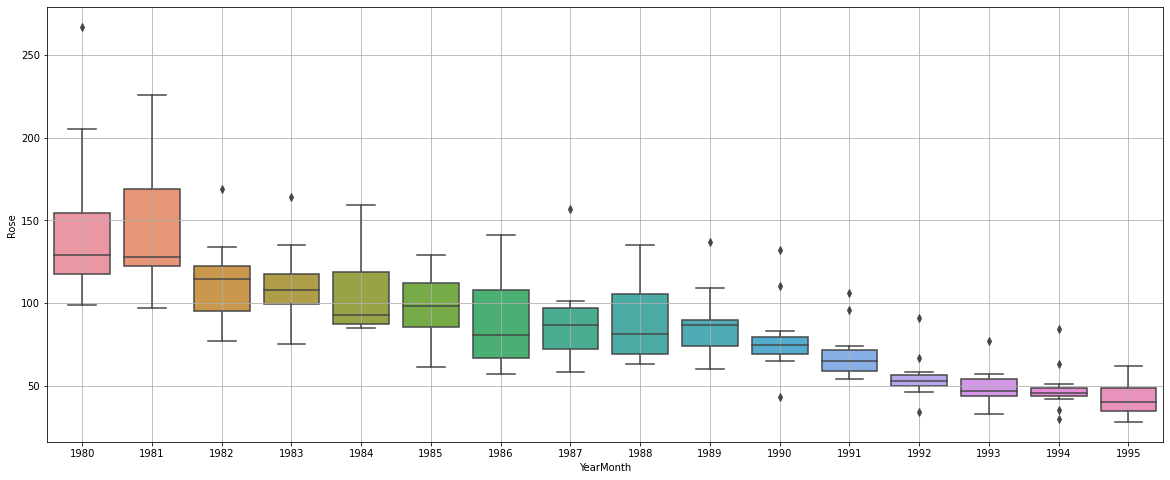

In [15]:
sns.boxplot(x = df_imputed.index.year, y = df_imputed['Rose'])
plt.grid();

The yearly boxplots also shows that the Rose wine sales have a downward Trend output for 16 years.

#### Monthly Plot

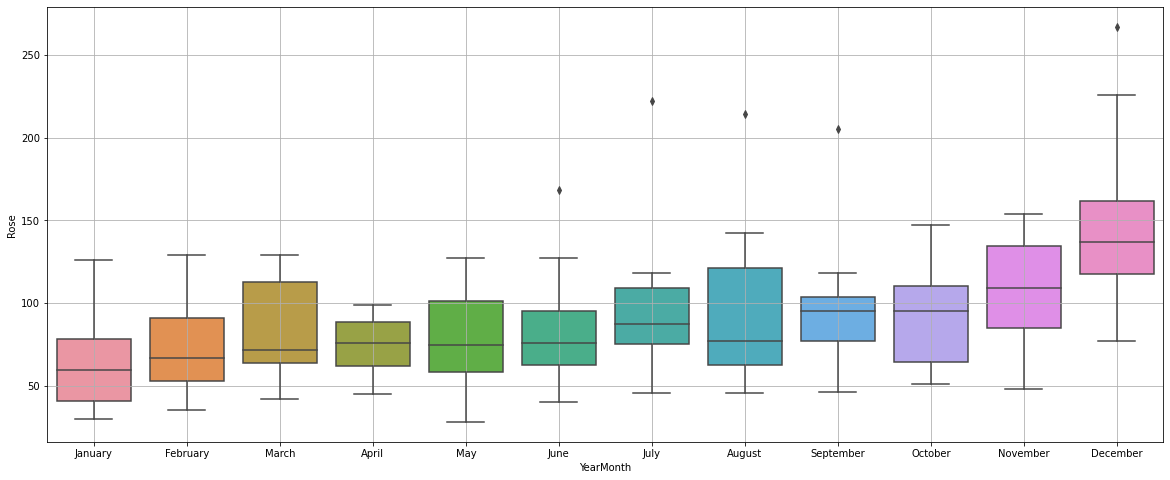

In [16]:
sns.boxplot(x = df_imputed.index.month_name(),y = df_imputed['Rose'])
plt.grid();

There is a clear distinction of 'Rose wine sales' within different months spread across various years. The highest such numbers are being recorded in the month of November and December across various years. The boxplot shows that the data has few outliers, but it will not affect the modelling.

### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

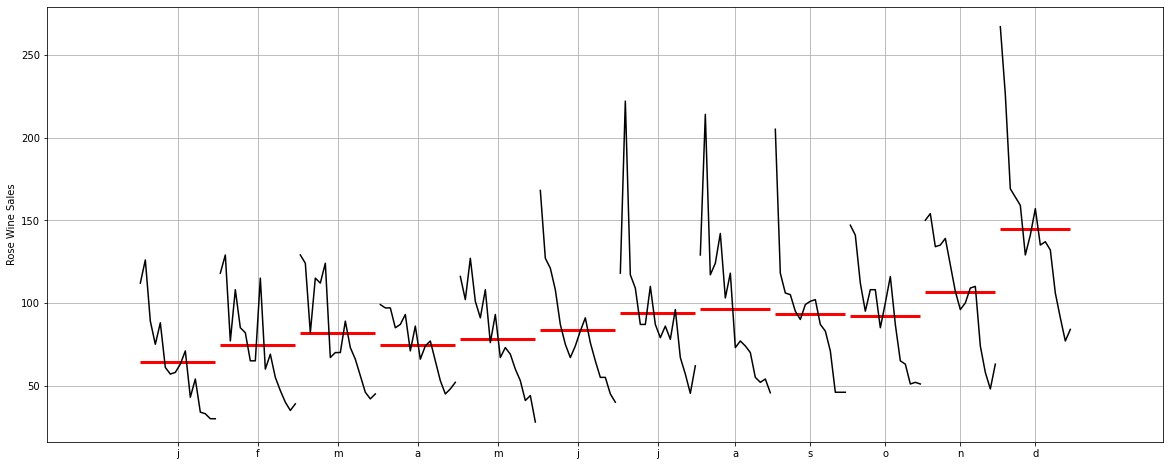

In [17]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_imputed['Rose'],ylabel='Rose Wine Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose Wine' in this case) across various months. The red line is the median value.

### Plot a graph of monthly Rose Wine Sales across years.

In [18]:
monthly_sales_across_years = pd.pivot_table(df_imputed, values = 'Rose', columns = df_imputed.index.month, index = df_imputed.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

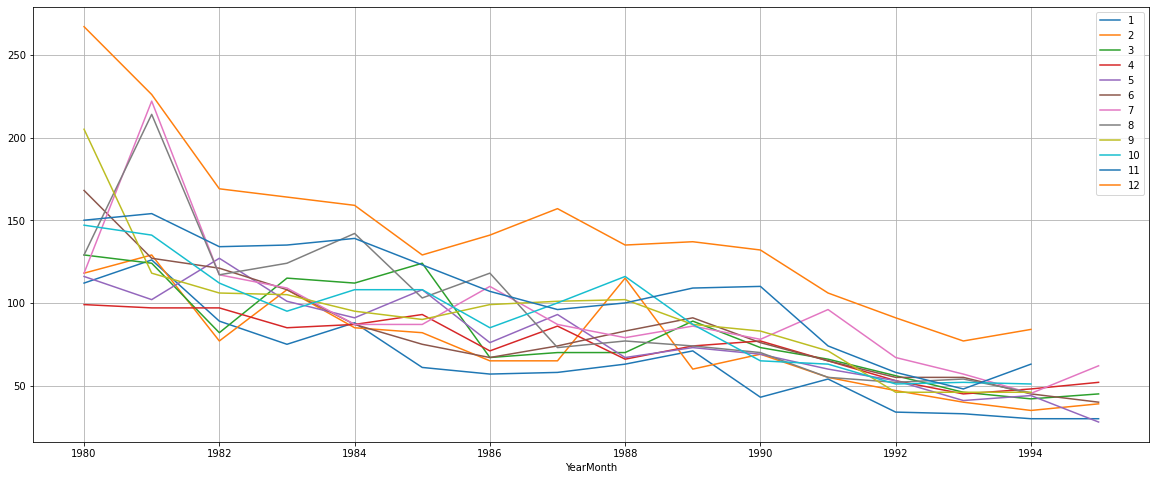

In [19]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### December month has the highest sales of Rose wine for all the years.

### Plot the Empirical Cumulative Distribution.

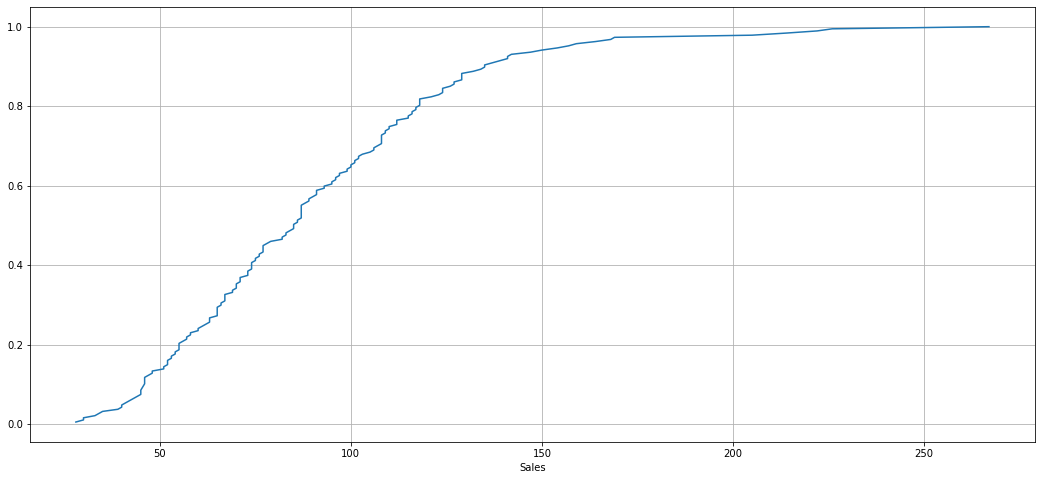

In [20]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_imputed['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

### Plot the average Rose Wine Sales per month and the month on month percentage change of Rose Wine Sales.

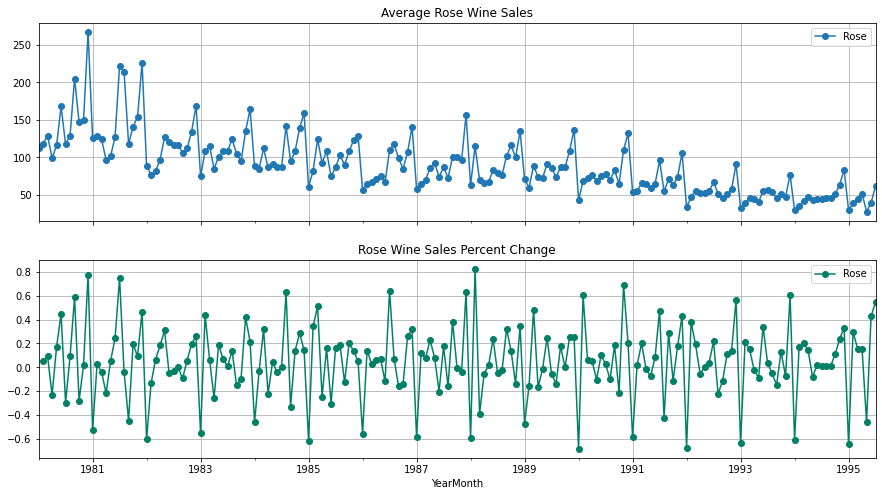

In [21]:
# group by date and get average Sales, and precent change
average    = df_imputed.groupby(df_imputed.index)["Rose"].mean()
pct_change = df_imputed.groupby(df_imputed.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Rose Wine Sales' and the Percentage change of 'Rose Wine Sales' with respect to the time.

### Decompose the Time Series and plot the different components.

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Decomposition

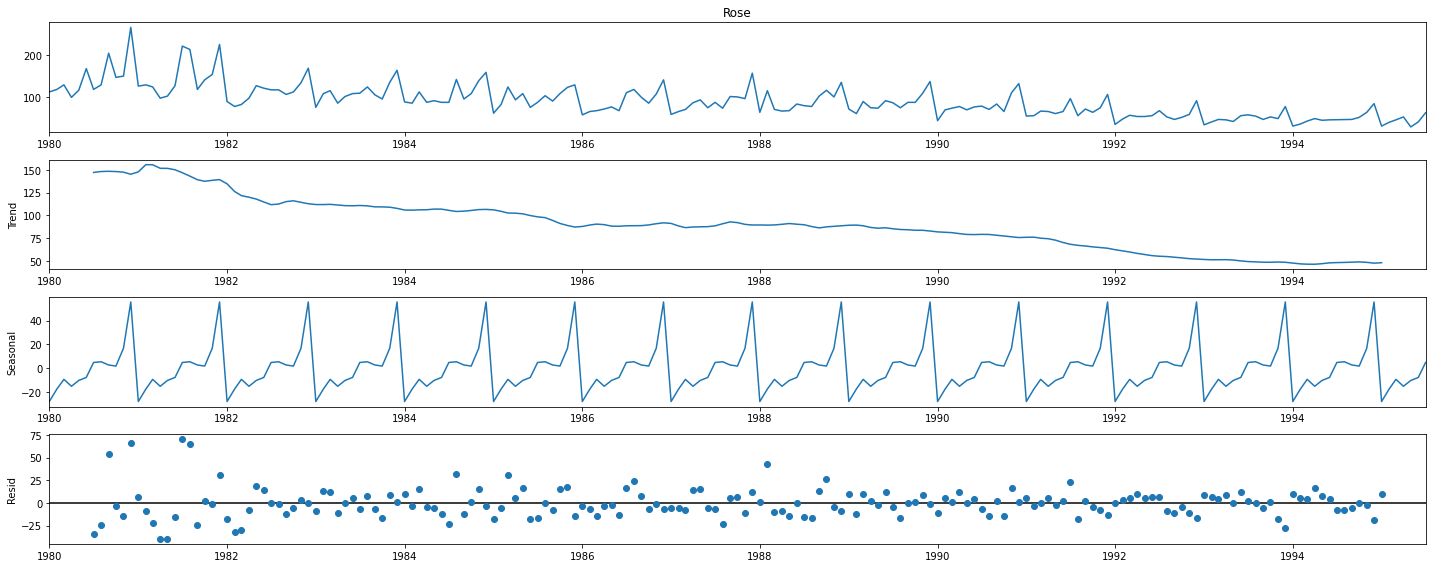

In [23]:
decomposition = seasonal_decompose(df_imputed['Rose'],model='additive')
decomposition.plot();

We see that the residuals are not located only around 0 from the plot of the residuals in the decomposition.Therefore we go for multiplicative decomposition.

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
19

### Multiplicative Decomposition

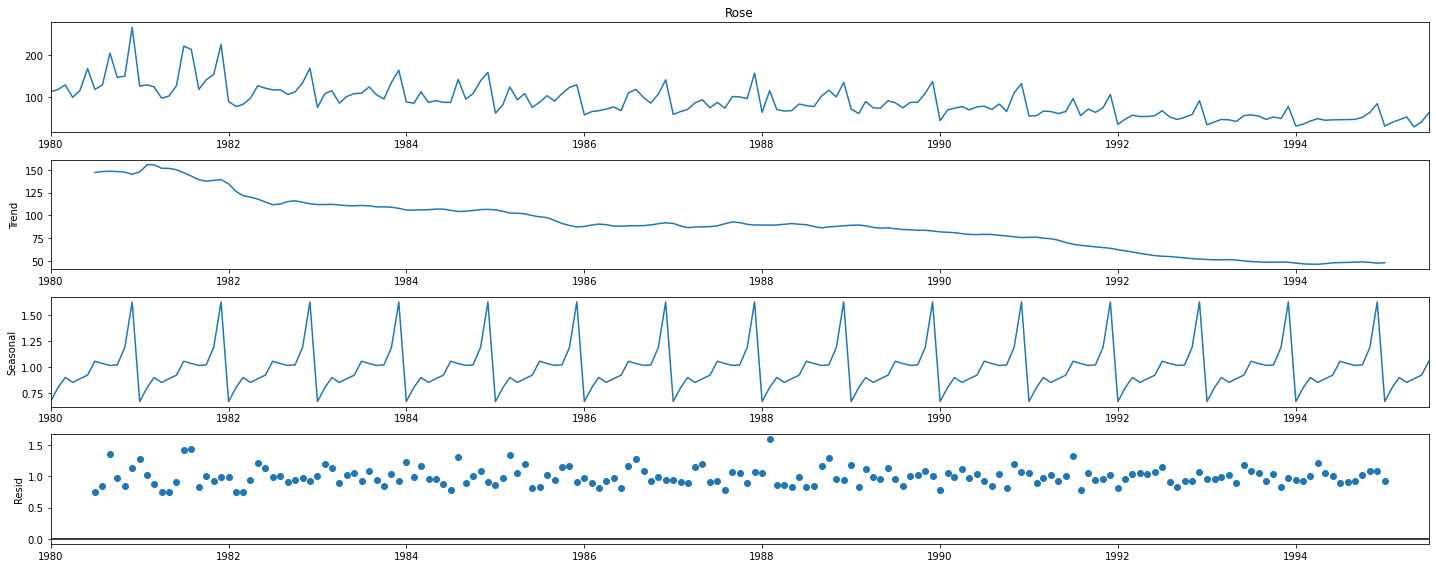

In [25]:
decomposition = seasonal_decompose(df_imputed['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Fr

### Check for stationarity of the whole Time Series data.

In [27]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

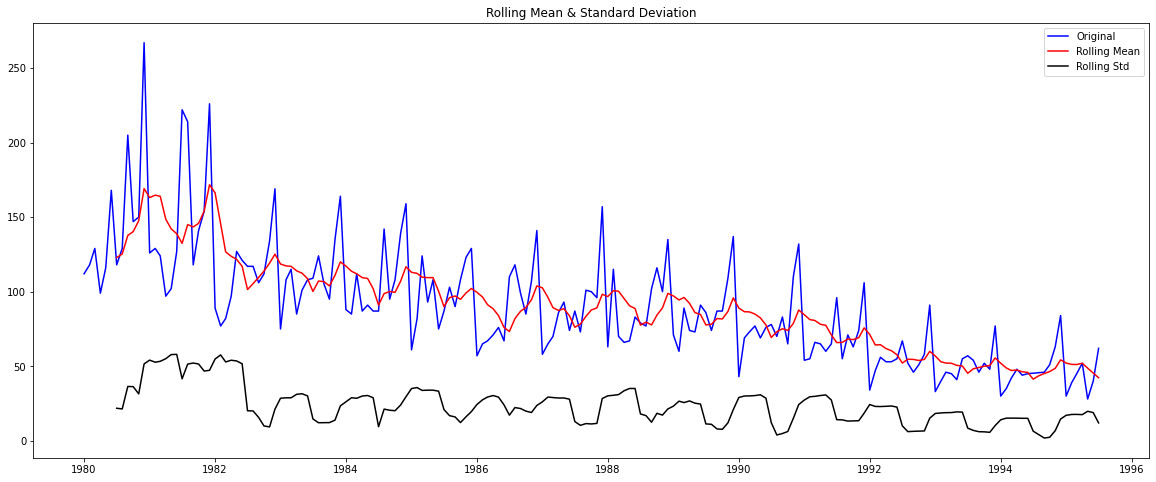

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [28]:
test_stationarity(df_imputed['Rose'])

### Inference:
We see that at 5% significant level the Time Series is non-stationary.
Let us take a difference of order 1 and check whether the Time Series is stationary or not.

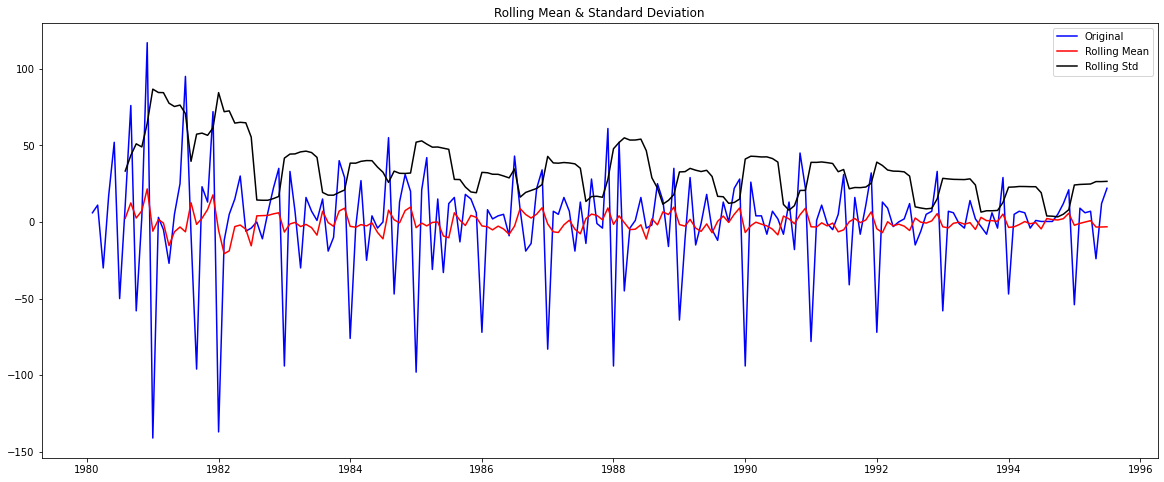

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [29]:
# Taking a difference of order 1 
test_stationarity(df_imputed['Rose'].diff().dropna())

### Inference:
- Perfect! Our series now looks like something undescribable, oscillating around zero. The Dickey-Fuller test indicates that it is stationary, and the number of significant peaks in ACF has dropped. We can finally start modeling! 
- We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

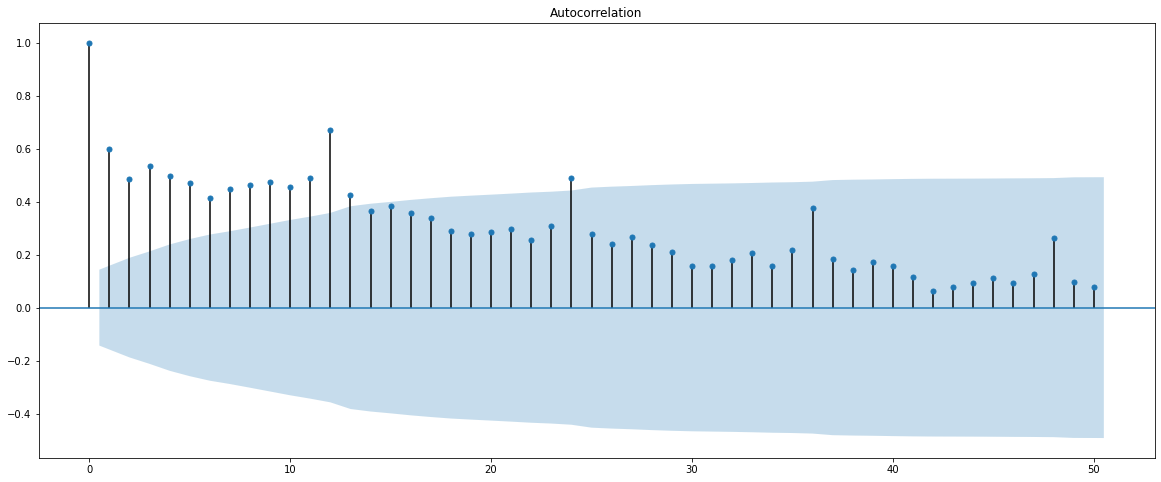

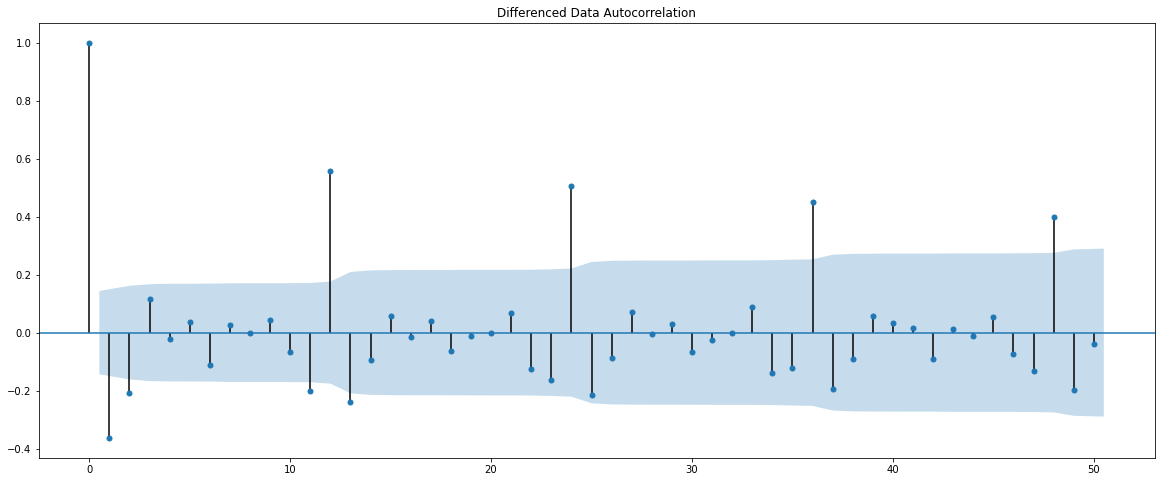

In [31]:
plot_acf(df_imputed['Rose'],lags=50)
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### We get the order of MA term or 'q' from ACF plot. Here the order of MA term is 2 from the differenced ACF plot

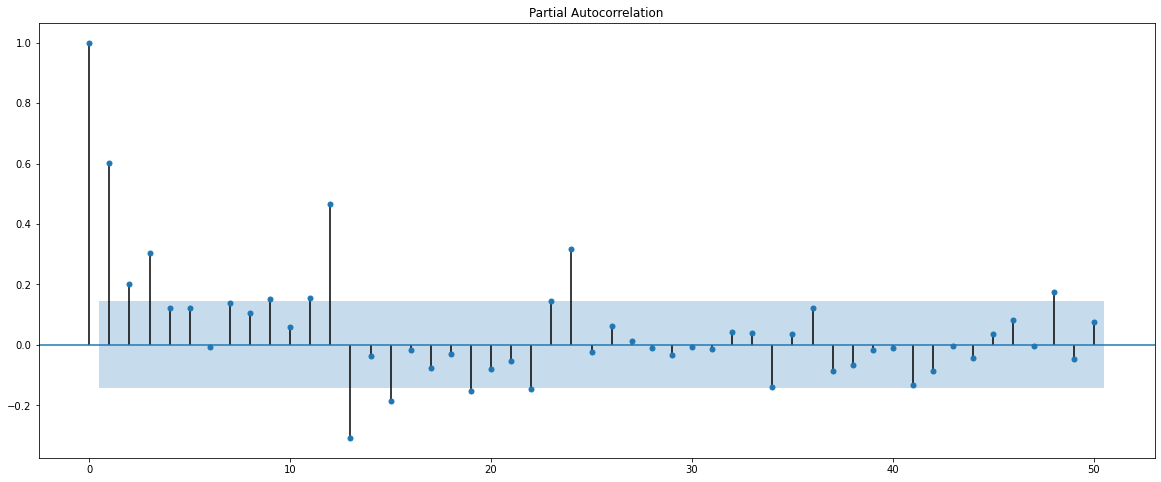

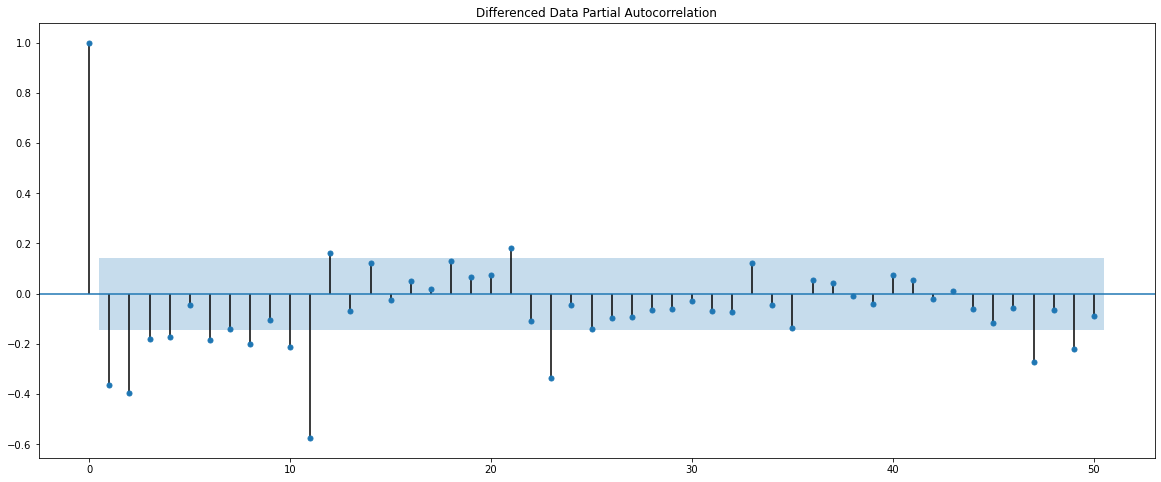

In [32]:
plot_pacf(df_imputed['Rose'],lags=50)
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### We get the order of AR term or 'p' from PACF plot. Here the order of AR term is (4,5,6,7,8) from the differenced PACF plot. From the above plots, we can also say that there seems to be a seasonality in the data.

### 3. Split the data into training and test. The test data should start in 1991.

### Train-Test Split

- Training Dataset: The sample of data used to fit the model.
- Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

- Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [33]:
train=df_imputed[df_imputed.index.year < 1991]
test=df_imputed[df_imputed.index.year >= 1991]

In [34]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [35]:
print('First few rows of Training Data')
display(train.head())

print('Last few rows of Training Data')
display(train.tail())

print('First few rows of Test Data')
display(test.head())

print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [36]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Modelling:

### Method 1: Regression on Time

In [37]:
df1         = df_imputed.copy() # Make a copy
time        = [i+1 for i in range(len(df_imputed))]
df1['time'] = time

df1.head(5)

Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

In [38]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [39]:
x_train = train.drop('Rose', axis=1)
x_test  = test.drop('Rose', axis=1)
y_train = train[['Rose']]
y_test  = test[['Rose']]

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

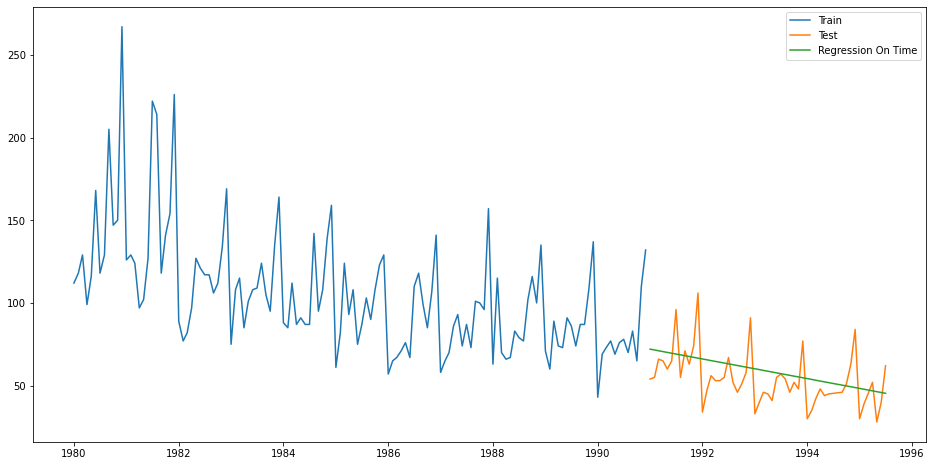

In [42]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [43]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [44]:
from math  import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTime))
RMSE = round(rmse, 3)
MAPE_ROT = MAPE(test.Rose, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(RMSE, MAPE_ROT))

For RegressionOnTime,  RMSE is 15.269 MAPE is 22.82


In [45]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'RMSE': [RMSE], 'MAPE' : [MAPE_ROT]})
resultsDf

Method    RMSE   MAPE
0  RegressionOnTime  15.269  22.82

### Method 2: Regression on Time With Seasonal Components

In [46]:
df1 = df_imputed.copy()
df1.drop(df1.index[186],inplace=True)
time = [i+1 for i in range(len(df1))]
df1.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [47]:
df1['time'] = time
print(df1.head())
print(df1.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']#defining the 12 
#months

             Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5
186


In [ ]:
df1['monthSeasonality'] = monthSeasonality * 3
df1.head()

In [ ]:
#monthDf = df1[['Month']]
#df1.drop('Month', axis=1, inplace=True)

In [52]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(2).T

YearMonth  1980-01-01  1980-02-01
Rose            112.0       118.0
time              1.0         2.0

In [53]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]
x_train = train.drop('Rose', axis=1)
x_test  = test.drop('Rose', axis=1)
y_train = train[['Rose']]
y_test  = test[['Rose']]

In [54]:
model   = LinearRegression()

In [55]:
model.fit(x_train, y_train)

LinearRegression()

In [56]:
predictions = model.predict(x_test)

In [57]:
y_test['RegOnTimeSeasonal'] = predictions

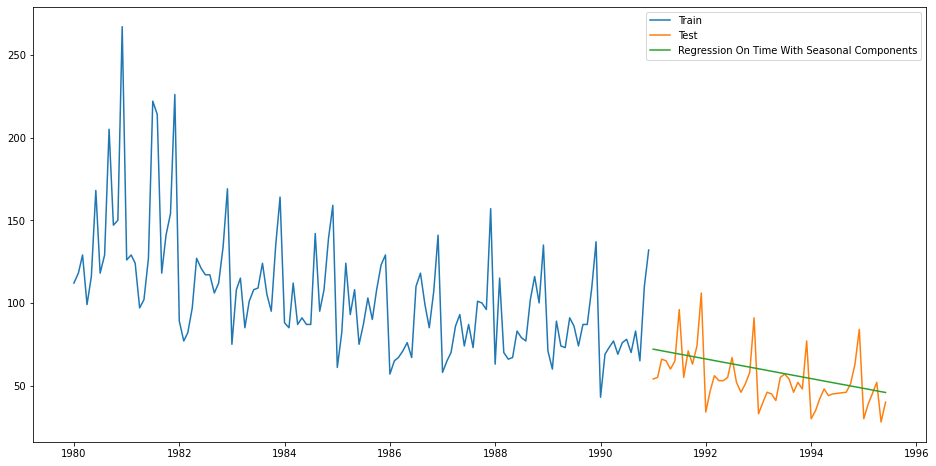

In [58]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [59]:
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTimeSeasonal))
RMSE = round(rmse, 3)
MAPE_ROTS = MAPE(test.Rose, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(rmse, MAPE_ROTS))

For RegOnTimeSeasonal,  RMSE is 15.243 MAPE is 22.73


In [60]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'RMSE': [RMSE], 'MAPE' : [MAPE_ROTS]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method    RMSE   MAPE
0          RegressionOnTime  15.269  22.82
0  RegressionOnTimeSeasonal  15.243  22.73

### Method 3: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

In [61]:
dd= np.asarray(train.Rose)

In [62]:
y_hat = test.copy()

In [63]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

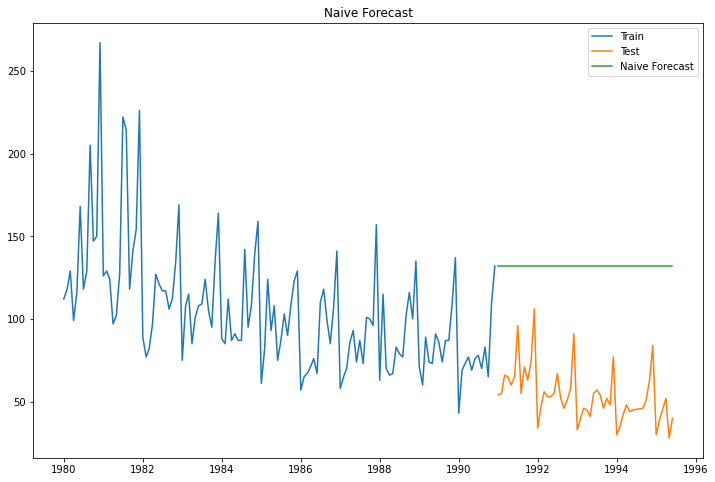

In [64]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Rose'], label='Train')
plt.plot(test.index,test['Rose'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [65]:
rmse = rmse = sqrt(mean_squared_error(test.Rose, y_hat.naive))
rmse = round(rmse, 3)
MAPE_Naive_model = MAPE(test.Rose, y_hat.naive)
print('For Naive model, RMSE:',rmse)
print('For Naive model, MAPE:',MAPE_Naive_model)

For Naive model, RMSE: 79.888
For Naive model, MAPE: 145.79


In [66]:
tempResultsDf = pd.DataFrame({'Method':['Naive_model'], 'RMSE': [rmse], 'MAPE' : [MAPE_Naive_model]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method    RMSE    MAPE
0          RegressionOnTime  15.269   22.82
0  RegressionOnTimeSeasonal  15.243   22.73
0               Naive_model  79.888  145.79

#### Inference:
- We can infer from the RMSE and MAPE values and the graphs above, that Naive model is not suited for datasets with high variability.

- RegressionOnTime method is best suited for this type of datasets. We can still improve our score by adopting different techniques.

- Now we will look at another technique and try to improve our score.

### Method 4: Simple Average

In [67]:
y_hat_avg = test.copy()

In [68]:
y_hat_avg['avg_forecast'] = train['Rose'].mean()

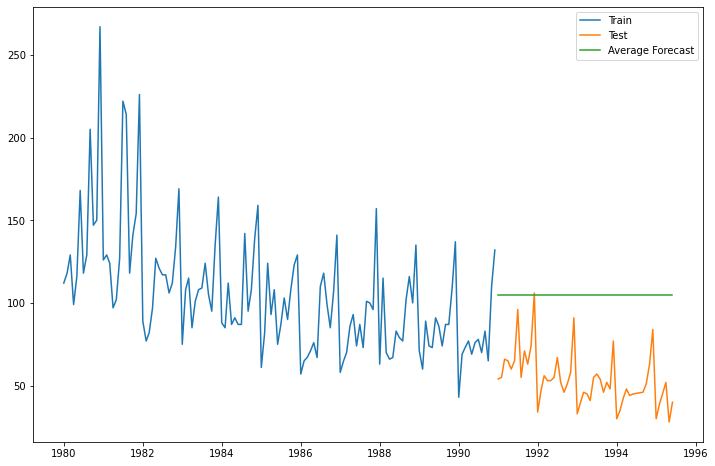

In [69]:
plt.figure(figsize=(12,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [70]:
rmse = rmse = sqrt(mean_squared_error(test.Rose, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
MAPE_Simple_Average = MAPE(test.Rose, y_hat_avg.avg_forecast)
print('For Simple Average model, RMSE:',rmse)
print('For Simple Average model, MAPE:',MAPE_Simple_Average)

For Simple Average model, RMSE: 53.636
For Simple Average model, MAPE: 95.48


In [71]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'RMSE': [rmse], 'MAPE' : [MAPE_Simple_Average]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method    RMSE    MAPE
0          RegressionOnTime  15.269   22.82
0  RegressionOnTimeSeasonal  15.243   22.73
0               Naive_model  79.888  145.79
0            Simple Average  53.636   95.48

### Inference

We can see that this model has improved our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. The score of Average method is better than Naive method. We should move step by step to each model and confirm whether it improves our model or not.

### Method 5: Moving Average (MA)

In [72]:
df1 = df_imputed.copy()

In [73]:
df1['moving_avg_forecast_4']  = df_imputed['Rose'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df_imputed['Rose'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df_imputed['Rose'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df_imputed['Rose'].rolling(12).mean()

For Moving Average model, moving_avg_forecast_4  RMSE is 14.451 MAPE is 19.49
For Moving Average model, moving_avg_forecast_6  RMSE is 14.566 MAPE is 20.82
For Moving Average model, moving_avg_forecast_8  RMSE is 14.805 MAPE is 21.06
For Moving Average model, moving_avg_forecast_12  RMSE is 15.236 MAPE is 22.07


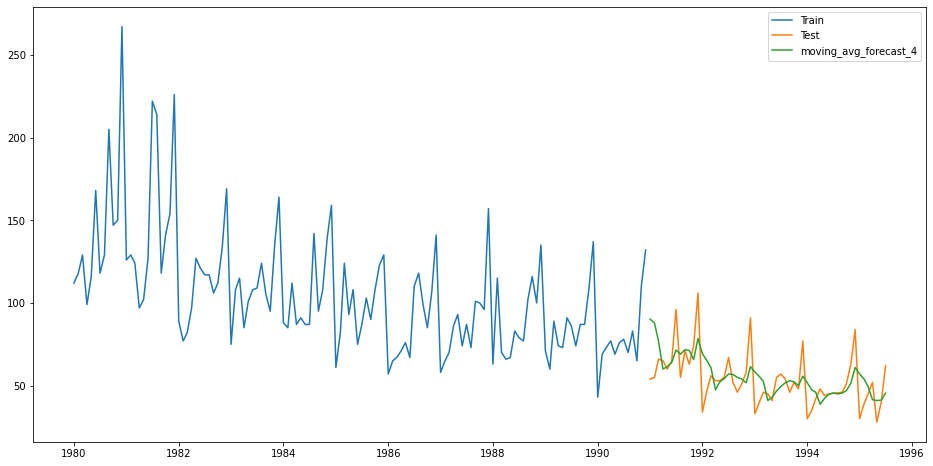

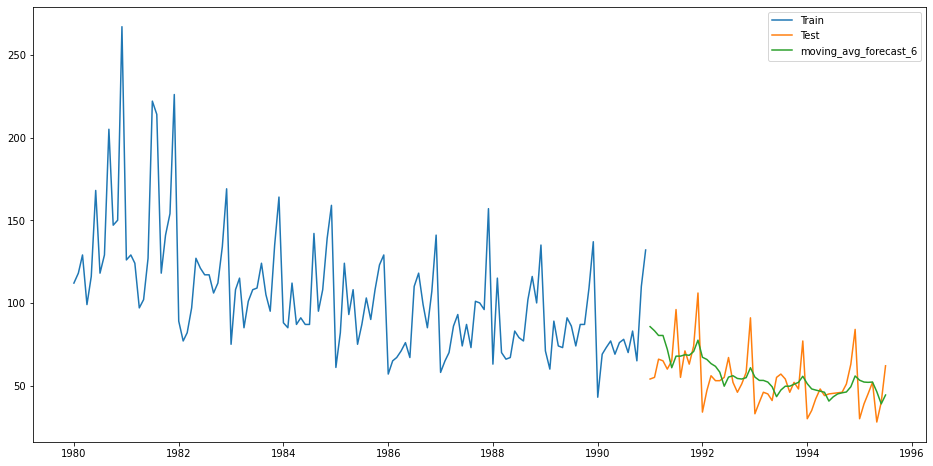

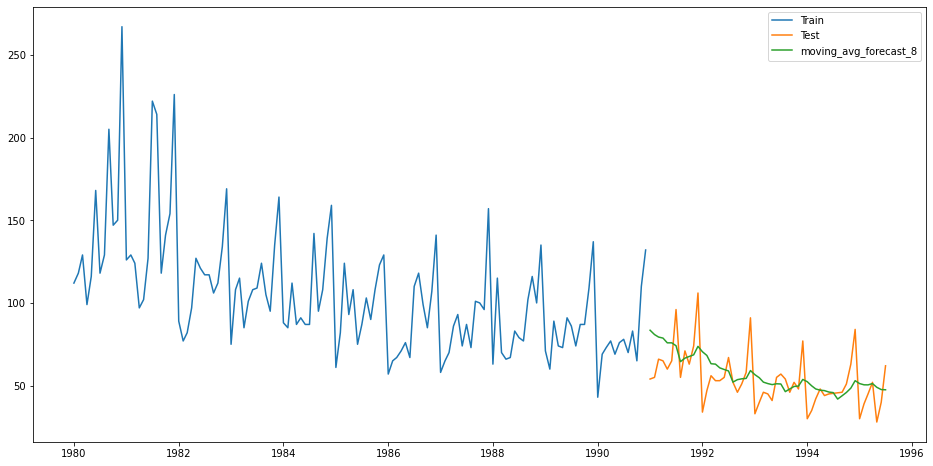

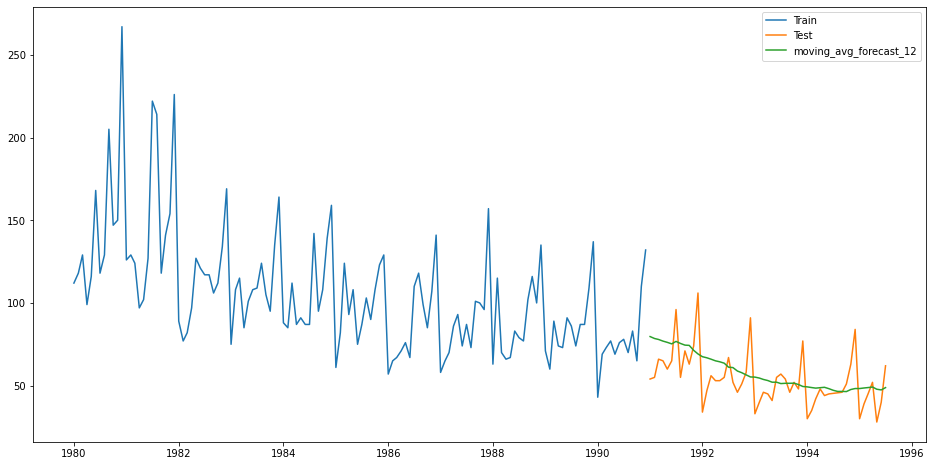

In [74]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Rose'], label='Train')
    plt.plot(test['Rose'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Rose, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Rose, y_hat_avg[col_name])
    print("For Moving Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    
    #Defining the data frame with the model evaluation parameters

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'RMSE': [rmse], 'MAPE' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [75]:
resultsDf

Method    RMSE    MAPE
0          RegressionOnTime  15.269   22.82
0  RegressionOnTimeSeasonal  15.243   22.73
0               Naive_model  79.888  145.79
0            Simple Average  53.636   95.48
0     moving_avg_forecast_4  14.451   19.49
0     moving_avg_forecast_6  14.566   20.82
0     moving_avg_forecast_8  14.805   21.06
0    moving_avg_forecast_12  15.236   22.07

### Method 6: Simple Exponential Smoothing

In [76]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [77]:
# create class
model = SimpleExpSmoothing(train['Rose'])

In [78]:
model_fit = model.fit(optimized = True)

In [140]:
print('')
print('== Simple Exponential Smoothing Parameters == ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing Parameters == 


Smoothing Level 0.1061
Initial Level 76.6557



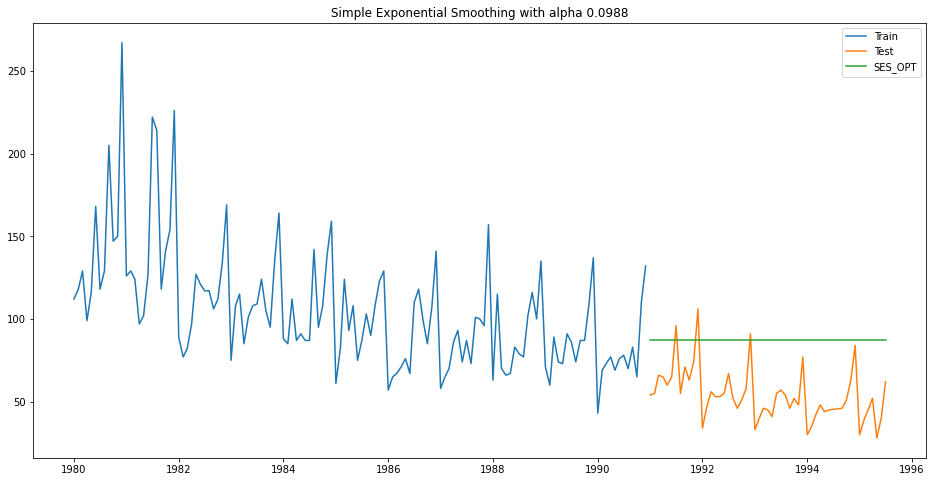

In [80]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Rose']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Rose'], label = 'Train')
plt.plot(test.index, test['Rose'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [81]:
rmse_opt =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg.SES))
mape_opt =  MAPE(test['Rose'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.10,  RMSE is 36.7963 MAPE is 63.88


In [82]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method      RMSE    MAPE
0          RegressionOnTime  15.26900   22.82
0  RegressionOnTimeSeasonal  15.24300   22.73
0               Naive_model  79.88800  145.79
0            Simple Average  53.63600   95.48
0     moving_avg_forecast_4  14.45100   19.49
0     moving_avg_forecast_6  14.56600   20.82
0     moving_avg_forecast_8  14.80500   21.06
0    moving_avg_forecast_12  15.23600   22.07
0                       SES  36.79625   63.88

### Method 7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [83]:
import statsmodels.api as sm

In [84]:
y_hat_avg = test.copy()

In [85]:
model_fit = Holt(np.asarray(train['Rose'])).fit()

In [86]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [87]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.1579
Smoothing Slope 0.1579
Initial Level 112.0



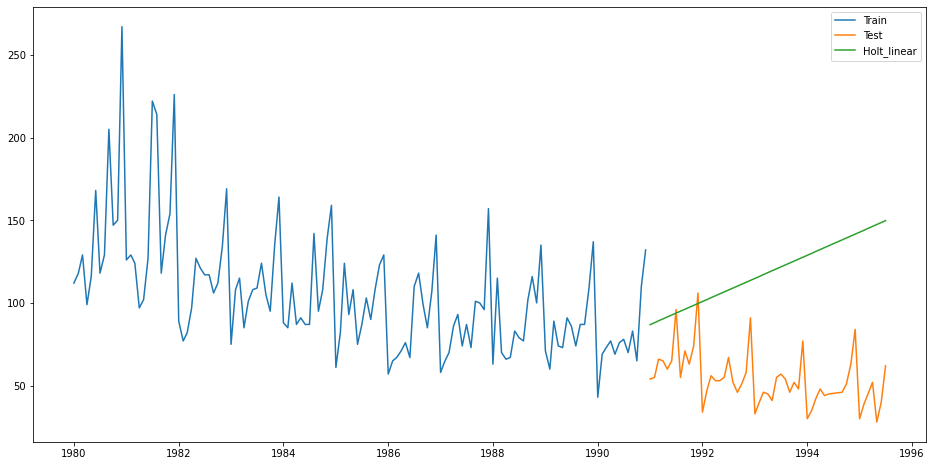

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [89]:
rmse_opt =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_linear']))
mape_opt =  MAPE(test['Rose'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.16,  RMSE is 70.5725 MAPE is 120.25


In [90]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_linear', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE    MAPE
0          RegressionOnTime  15.269000   22.82
0  RegressionOnTimeSeasonal  15.243000   22.73
0               Naive_model  79.888000  145.79
0            Simple Average  53.636000   95.48
0     moving_avg_forecast_4  14.451000   19.49
0     moving_avg_forecast_6  14.566000   20.82
0     moving_avg_forecast_8  14.805000   21.06
0    moving_avg_forecast_12  15.236000   22.07
0                       SES  36.796250   63.88
0               Holt_linear  70.572452  120.25

### Method 8: Holt-Winters Method - Additive seasonality

In [91]:
y_hat_avg = test.copy()

In [92]:
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [93]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

#### Plot the predicted Time Series Graph on the Test Data and compare the RMSE and the MAPE to the data frame to compare the model evaluation parameters.

In [94]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.1335
Smoothing Slope:  0.0138
Smoothing Seasonal:  0.0
Initial Level:  76.4124
Initial Slope:  0.0
Initial Seasons:  [ 38.6866  51.0194  58.9935  48.3253  57.1198  62.5497  72.4366  78.509
  74.4762  72.5421  90.6124 132.8721]



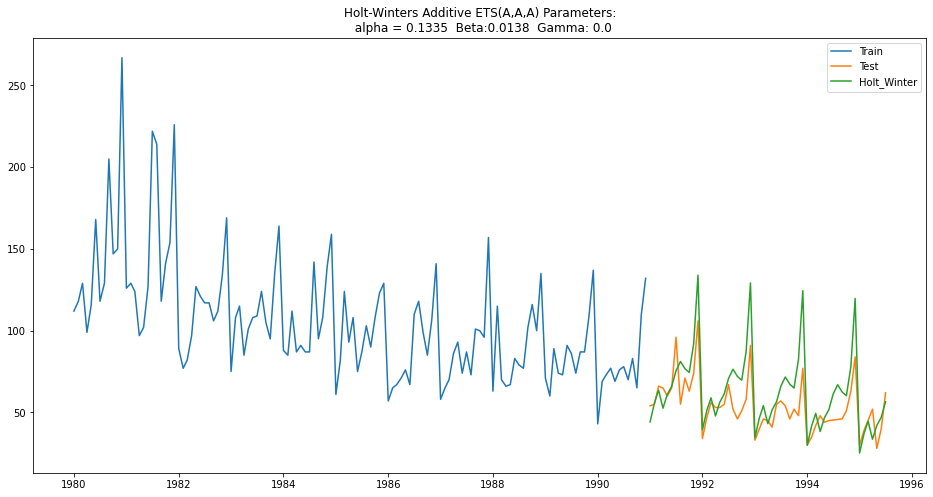

In [95]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [96]:
rmse_opt =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter']))
mape_opt =  MAPE(test['Rose'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.13, beta = 0.01, gamma = 0.00, RMSE is 16.4471 MAPE is 22.88


In [97]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE    MAPE
0          RegressionOnTime  15.269000   22.82
0  RegressionOnTimeSeasonal  15.243000   22.73
0               Naive_model  79.888000  145.79
0            Simple Average  53.636000   95.48
0     moving_avg_forecast_4  14.451000   19.49
0     moving_avg_forecast_6  14.566000   20.82
0     moving_avg_forecast_8  14.805000   21.06
0    moving_avg_forecast_12  15.236000   22.07
0                       SES  36.796250   63.88
0               Holt_linear  70.572452  120.25
0               Holt_Winter  16.447061   22.88

### Method 9: Holt-Winters Method - Multiplicative Model

In [98]:
y_hat_avg = test.copy()

In [99]:
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [100]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

#### Plot the predicted Time Series Graph on the Test Data and compare the RMSE and the MAPE to the data frame to compare the model evaluation parameters.

In [101]:
print('')
print('== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==

Smoothing Level:  0.1061
Smoothing Slope:  0.0484
Smoothing Seasonal:  0.0
Initial Level:  76.6557
Initial Slope:  0.0
Initial Seasons:  [1.4755 1.6593 1.8057 1.5889 1.7782 1.926  2.1165 2.2514 2.1169 2.0811
 2.4093 3.3045]



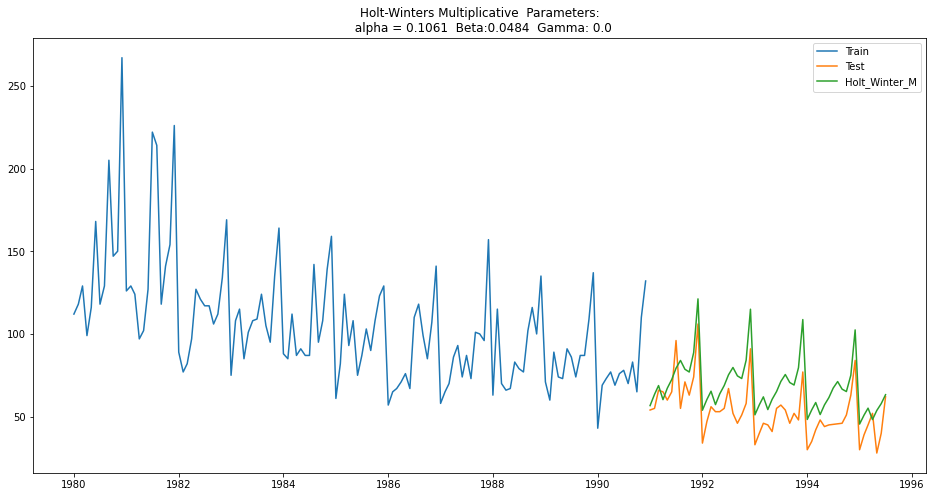

In [102]:
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [103]:
rmse_opt =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter_M']))
mape_opt =  MAPE(test['Rose'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.11, beta = 0.05, gamma = 0.00, RMSE is 17.3695 MAPE is 28.88


In [104]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'RMSE': [rmse_opt], 'MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE    MAPE
0          RegressionOnTime  15.269000   22.82
0  RegressionOnTimeSeasonal  15.243000   22.73
0               Naive_model  79.888000  145.79
0            Simple Average  53.636000   95.48
0     moving_avg_forecast_4  14.451000   19.49
0     moving_avg_forecast_6  14.566000   20.82
0     moving_avg_forecast_8  14.805000   21.06
0    moving_avg_forecast_12  15.236000   22.07
0                       SES  36.796250   63.88
0               Holt_linear  70.572452  120.25
0               Holt_Winter  16.447061   22.88
0             Holt_Winter M  17.369490   28.88

### Inference
As of now, we observe that Moving average of window width of 4 seems to be a good fit for the data.

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the Training Data Time Series.

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

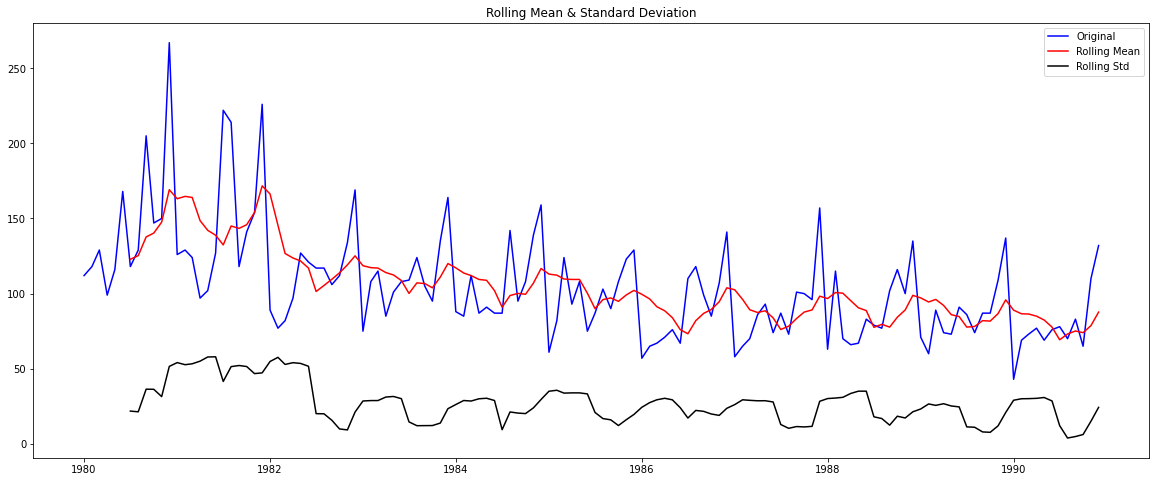

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [105]:
test_stationarity(train['Rose'])

#### We see that the series is not stationary at  𝛼  = 0.05.

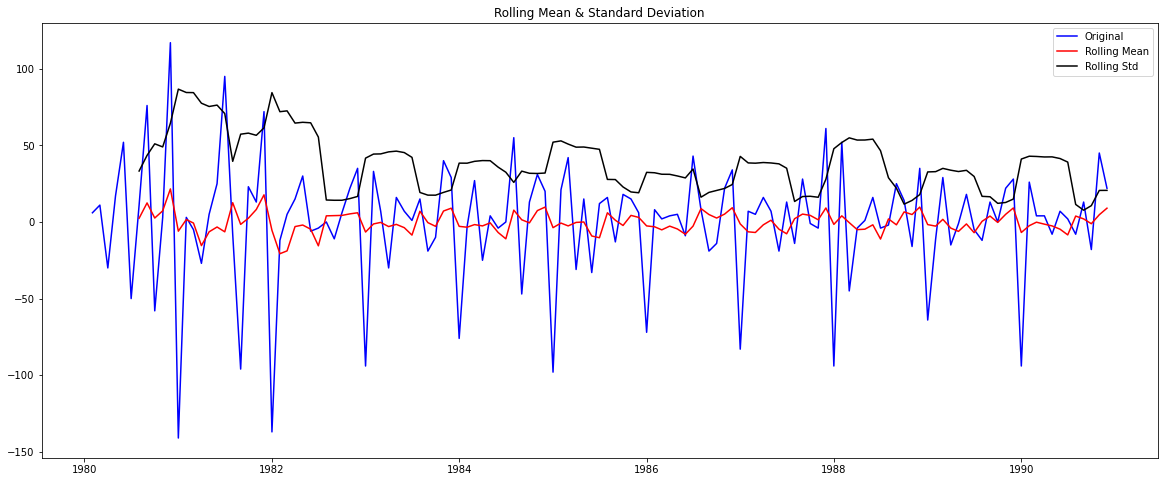

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [106]:
test_stationarity(train['Rose'].diff().dropna())

#### We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

- The results show that the test statistic i.e. the p-value is 7.061944e-09 which is <0.05, therefore, we reject the null hypothesis and hence time series is stationary. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).
- Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Freq: MS
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rose                    132 non-null    float64
 1   moving_avg_forecast_4   129 non-null    float64
 2   moving_avg_forecast_6   127 non-null    float64
 3   moving_avg_forecast_8   125 non-null    float64
 4   moving_avg_forecast_12  121 non-null    float64
dtypes: float64(5)
memory usage: 6.2 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Method 10: Auto ARIMA Model

In [108]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [109]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [110]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464574
ARIMA(0, 1, 2) - AIC:1276.8353748417176
ARIMA(0, 1, 3) - AIC:1278.0742539928428
ARIMA(0, 1, 4) - AIC:1278.838364225639
ARIMA(1, 1, 0) - AIC:1319.34831058018
ARIMA(1, 1, 1) - AIC:1277.7757474534856
ARIMA(1, 1, 2) - AIC:1277.3592258043973
ARIMA(1, 1, 3) - AIC:1279.3126334690855
ARIMA(1, 1, 4) - AIC:1281.8925105429257
ARIMA(2, 1, 0) - AIC:1300.6092611745298
ARIMA(2, 1, 1) - AIC:1279.0456894093093
ARIMA(2, 1, 2) - AIC:1279.2986939365032
ARIMA(2, 1, 3) - AIC:1281.1962260435753
ARIMA(2, 1, 4) - AIC:1282.4167595524675
ARIMA(3, 1, 0) - AIC:1299.4787391543066
ARIMA(3, 1, 1) - AIC:1279.6059654279866
ARIMA(3, 1, 2) - AIC:1280.969246685493
ARIMA(3, 1, 3) - AIC:1273.1941688331408
ARIMA(3, 1, 4) - AIC:1274.334960924136
ARIMA(4, 1, 0) - AIC:1298.3195533735447
ARIMA(4, 1, 1) - AIC:1281.1163245052649
ARIMA(4, 1, 2) - AIC:1283.7527278574573
ARIMA(4, 1, 3) - AIC:1284.9526869790006
ARIMA(4, 1, 4) - AIC:1284.7721579985064


In [111]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
18  (3, 1, 3)  1273.194169
19  (3, 1, 4)  1274.334961
2   (0, 1, 2)  1276.835375
7   (1, 1, 2)  1277.359226
6   (1, 1, 1)  1277.775747
3   (0, 1, 3)  1278.074254
4   (0, 1, 4)  1278.838364
11  (2, 1, 1)  1279.045689
12  (2, 1, 2)  1279.298694
8   (1, 1, 3)  1279.312633
16  (3, 1, 1)  1279.605965
1   (0, 1, 1)  1280.726183
17  (3, 1, 2)  1280.969247
21  (4, 1, 1)  1281.116325
13  (2, 1, 3)  1281.196226
9   (1, 1, 4)  1281.892511
14  (2, 1, 4)  1282.416760
22  (4, 1, 2)  1283.752728
24  (4, 1, 4)  1284.772158
23  (4, 1, 3)  1284.952687
20  (4, 1, 0)  1298.319553
15  (3, 1, 0)  1299.478739
10  (2, 1, 0)  1300.609261
5   (1, 1, 0)  1319.348311
0   (0, 1, 0)  1335.152658

In [112]:
auto_ARIMA = ARIMA(train['Rose'], order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.355
Date:                Sun, 13 Sep 2020   AIC                           1273.194
Time:                        16:56:40   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.549      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7245      0.086     -8.430      0.000      -0.893      -0.556
ar.L2.D.Rose    -0.7219      0.086     -8.36

### Predict on the Test Set using this model and evaluate the model.

In [113]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [114]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
MAPE_auto_ARIMA = MAPE(test['Rose'],predicted_auto_ARIMA[0])
print('RMSE:',rmse)
print('MAPE:',MAPE_auto_ARIMA)

RMSE: 15.9850921764589
MAPE: 26.08


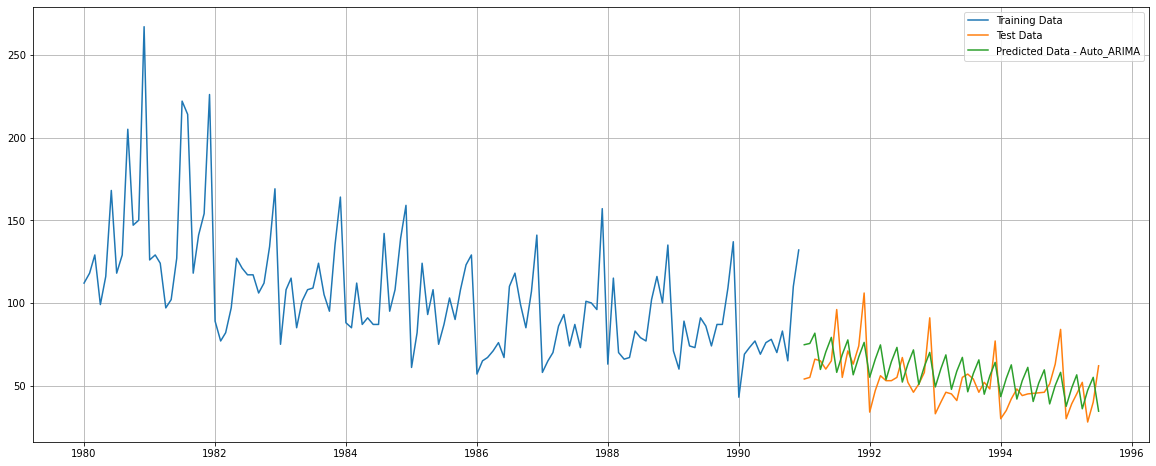

In [115]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - Auto_ARIMA')
plt.legend(loc='best')
plt.grid();

In [116]:
tempResultsDf = pd.DataFrame({'Method': ['Auto_ARIMA(3,1,3)'],'RMSE': [rmse], 'MAPE':[MAPE_auto_ARIMA]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method       RMSE    MAPE
0          RegressionOnTime  15.269000   22.82
0  RegressionOnTimeSeasonal  15.243000   22.73
0               Naive_model  79.888000  145.79
0            Simple Average  53.636000   95.48
0     moving_avg_forecast_4  14.451000   19.49
0     moving_avg_forecast_6  14.566000   20.82
0     moving_avg_forecast_8  14.805000   21.06
0    moving_avg_forecast_12  15.236000   22.07
0                       SES  36.796250   63.88
0               Holt_linear  70.572452  120.25
0               Holt_Winter  16.447061   22.88
0             Holt_Winter M  17.369490   28.88
0         Auto_ARIMA(3,1,3)  15.985092   26.08

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Method 11: Manual ARIMA Model

Let us look at the ACF and the PACF plots once more.

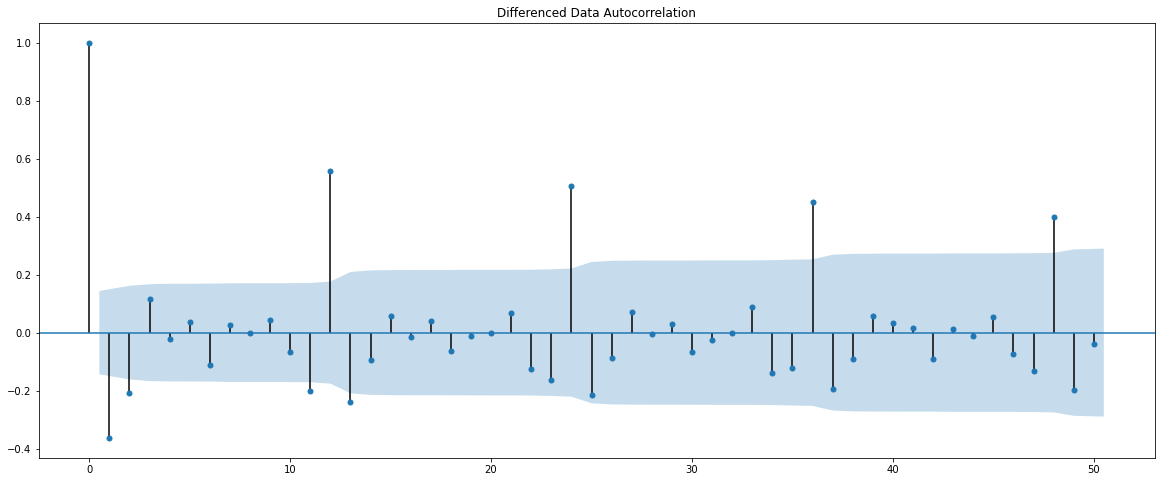

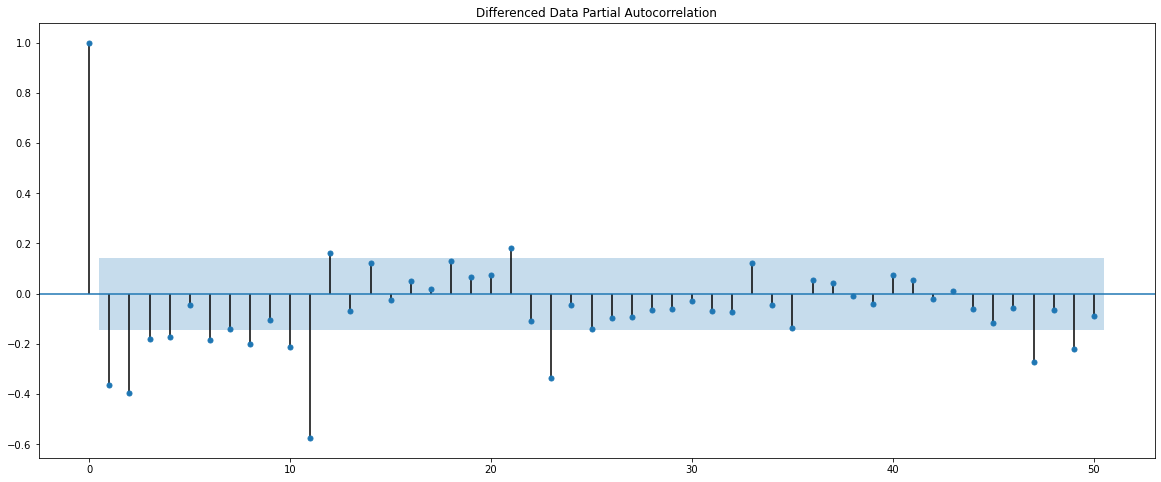

In [117]:
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Inference:

Here, we have taken alpha = 0.05.

- The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
- The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.
- By looking at the above plots, we can say that the order od MA is 2 and the order of AR is 2.

In [118]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 13 Sep 2020   AIC                           1279.299
Time:                        16:57:00   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

We get a comparatively simpler model by looking at the ACF and the PACF plots.

### Predict on the Test Set using this model and evaluate the model.

In [119]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [120]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
MAPE_manual_ARIMA = MAPE(test['Rose'],predicted_manual_ARIMA[0])
print('RMSE:',rmse)
print('MAPE:',MAPE_manual_ARIMA)

RMSE: 15.35487919601059
MAPE: 22.77


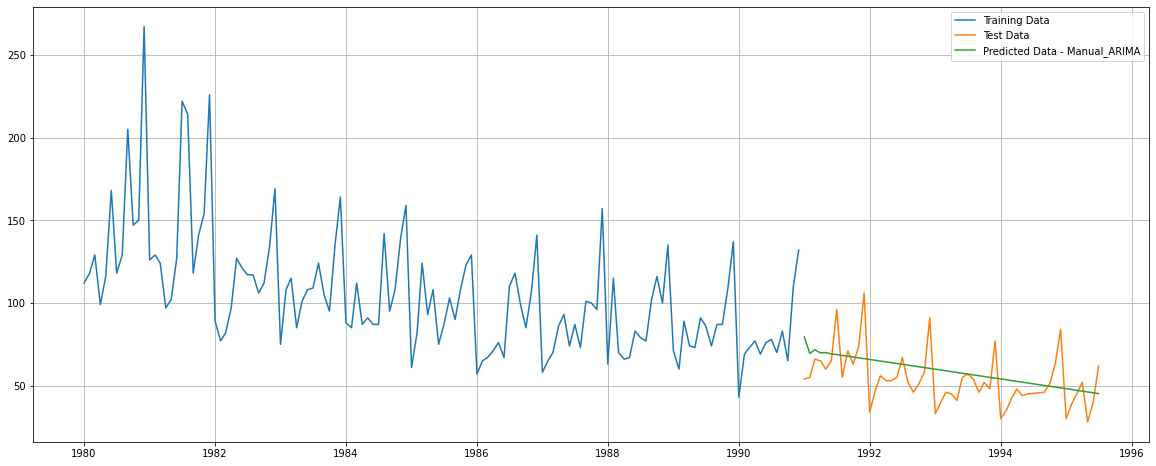

In [121]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - Manual_ARIMA')
plt.legend(loc='best')
plt.grid();

In [122]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_ARIMA(2,1,2)'],'RMSE': [rmse], 'MAPE':[MAPE_manual_ARIMA]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE    MAPE
0          RegressionOnTime  15.269000   22.82
0  RegressionOnTimeSeasonal  15.243000   22.73
0               Naive_model  79.888000  145.79
0            Simple Average  53.636000   95.48
0     moving_avg_forecast_4  14.451000   19.49
0     moving_avg_forecast_6  14.566000   20.82
0     moving_avg_forecast_8  14.805000   21.06
0    moving_avg_forecast_12  15.236000   22.07
0                       SES  36.796250   63.88
0               Holt_linear  70.572452  120.25
0               Holt_Winter  16.447061   22.88
0             Holt_Winter M  17.369490   28.88
0         Auto_ARIMA(3,1,3)  15.985092   26.08
0       Manual_ARIMA(2,1,2)  15.354879   22.77

### Method 12: Auto SARIMA Model_6

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

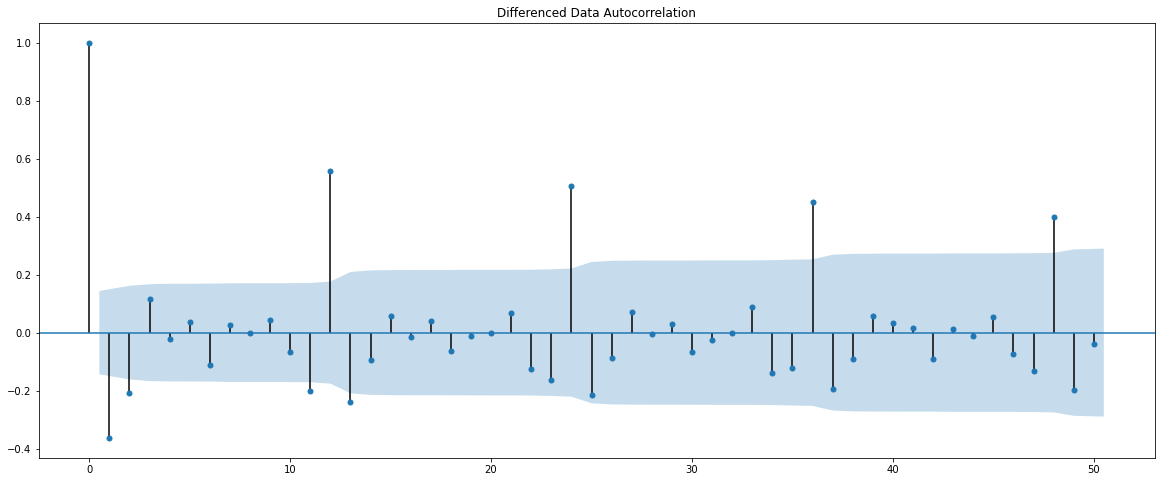

In [123]:
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### Inference:
- We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [124]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [125]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [126]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:1264.4996261113854
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1144.707747182744
SARIMA(0, 1, 0)x(0, 0, 3, 6)7 - AIC:1081.271383062513
SARIMA(0, 1, 0)x(0, 0, 4, 6)7 - AIC:977.1491518512042
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:1241.7870945149125
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1146.3093266722374
SARIMA(0, 1, 0)x(1, 0, 3, 6)7 - AIC:1058.986174312433
SARIMA(0, 1, 0)x(1, 0, 4, 6)7 - AIC:978.594672292349
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1137.453362951521
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1117.0224426194002
SARIMA(0, 1, 0)x(2, 0, 3, 6)7 - AIC:1058.8048206423418
SARIMA(0, 1, 0)x(2, 0, 4, 6)7 - AIC:970.5079607535762
SARIMA(0, 1, 0)x(3, 0, 0, 6)7 - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6)7 - AIC:1061.3687765139846
SARIMA(0, 1, 0)x(3, 0, 2, 6)7 - AIC:1058.0425053616902
SARIMA(0, 1, 0)x(3

SARIMA(1, 1, 1)x(0, 0, 1, 6)7 - AIC:1201.5037144424398
SARIMA(1, 1, 1)x(0, 0, 2, 6)7 - AIC:1093.604431760633
SARIMA(1, 1, 1)x(0, 0, 3, 6)7 - AIC:1016.7345933691438
SARIMA(1, 1, 1)x(0, 0, 4, 6)7 - AIC:924.2699125526391
SARIMA(1, 1, 1)x(1, 0, 0, 6)7 - AIC:1213.623314313084
SARIMA(1, 1, 1)x(1, 0, 1, 6)7 - AIC:1162.4240004378169
SARIMA(1, 1, 1)x(1, 0, 2, 6)7 - AIC:1083.2585834383826
SARIMA(1, 1, 1)x(1, 0, 3, 6)7 - AIC:1003.9567058451163
SARIMA(1, 1, 1)x(1, 0, 4, 6)7 - AIC:930.7072546314749
SARIMA(1, 1, 1)x(2, 0, 0, 6)7 - AIC:1083.900691126674
SARIMA(1, 1, 1)x(2, 0, 1, 6)7 - AIC:1083.1711266751056
SARIMA(1, 1, 1)x(2, 0, 2, 6)7 - AIC:1052.778469729612
SARIMA(1, 1, 1)x(2, 0, 3, 6)7 - AIC:963.6530363717924
SARIMA(1, 1, 1)x(2, 0, 4, 6)7 - AIC:919.9120212359196
SARIMA(1, 1, 1)x(3, 0, 0, 6)7 - AIC:1017.9974834538212
SARIMA(1, 1, 1)x(3, 0, 1, 6)7 - AIC:1021.0487743443402
SARIMA(1, 1, 1)x(3, 0, 2, 6)7 - AIC:1006.9933719492153
SARIMA(1, 1, 1)x(3, 0, 3, 6)7 - AIC:966.2785206920373
SARIMA(1, 1, 1)x(3,

SARIMA(2, 1, 2)x(0, 0, 2, 6)7 - AIC:1082.558103334088
SARIMA(2, 1, 2)x(0, 0, 3, 6)7 - AIC:1005.4894643085391
SARIMA(2, 1, 2)x(0, 0, 4, 6)7 - AIC:917.3111187741529
SARIMA(2, 1, 2)x(1, 0, 0, 6)7 - AIC:1200.4217492510875
SARIMA(2, 1, 2)x(1, 0, 1, 6)7 - AIC:1150.728328537005
SARIMA(2, 1, 2)x(1, 0, 2, 6)7 - AIC:1063.1103215207709
SARIMA(2, 1, 2)x(1, 0, 3, 6)7 - AIC:996.8723984920329
SARIMA(2, 1, 2)x(1, 0, 4, 6)7 - AIC:915.6972797623602
SARIMA(2, 1, 2)x(2, 0, 0, 6)7 - AIC:1073.696145786873
SARIMA(2, 1, 2)x(2, 0, 1, 6)7 - AIC:1070.0771798927462
SARIMA(2, 1, 2)x(2, 0, 2, 6)7 - AIC:1045.2204238348565
SARIMA(2, 1, 2)x(2, 0, 3, 6)7 - AIC:961.0659783115418
SARIMA(2, 1, 2)x(2, 0, 4, 6)7 - AIC:909.2258123939879
SARIMA(2, 1, 2)x(3, 0, 0, 6)7 - AIC:975.6133308871254
SARIMA(2, 1, 2)x(3, 0, 1, 6)7 - AIC:977.0520555749935
SARIMA(2, 1, 2)x(3, 0, 2, 6)7 - AIC:962.9964642247028
SARIMA(2, 1, 2)x(3, 0, 3, 6)7 - AIC:962.7649519131043
SARIMA(2, 1, 2)x(3, 0, 4, 6)7 - AIC:904.5326767643514
SARIMA(2, 1, 2)x(4, 0, 

SARIMA(3, 1, 3)x(0, 0, 4, 6)7 - AIC:910.8622162903781
SARIMA(3, 1, 3)x(1, 0, 0, 6)7 - AIC:1179.1465440454501
SARIMA(3, 1, 3)x(1, 0, 1, 6)7 - AIC:1126.6260820978232
SARIMA(3, 1, 3)x(1, 0, 2, 6)7 - AIC:1057.3118732390963
SARIMA(3, 1, 3)x(1, 0, 3, 6)7 - AIC:982.6950794788729
SARIMA(3, 1, 3)x(1, 0, 4, 6)7 - AIC:903.5899445126356
SARIMA(3, 1, 3)x(2, 0, 0, 6)7 - AIC:1044.9852589803725
SARIMA(3, 1, 3)x(2, 0, 1, 6)7 - AIC:1054.3672228326545
SARIMA(3, 1, 3)x(2, 0, 2, 6)7 - AIC:1037.7522303854869
SARIMA(3, 1, 3)x(2, 0, 3, 6)7 - AIC:952.5821024449855
SARIMA(3, 1, 3)x(2, 0, 4, 6)7 - AIC:891.0659616722722
SARIMA(3, 1, 3)x(3, 0, 0, 6)7 - AIC:964.836466157207
SARIMA(3, 1, 3)x(3, 0, 1, 6)7 - AIC:966.4949693979618
SARIMA(3, 1, 3)x(3, 0, 2, 6)7 - AIC:964.5769998658143
SARIMA(3, 1, 3)x(3, 0, 3, 6)7 - AIC:954.4665598986812
SARIMA(3, 1, 3)x(3, 0, 4, 6)7 - AIC:895.066839082511
SARIMA(3, 1, 3)x(4, 0, 0, 6)7 - AIC:886.7062908449018
SARIMA(3, 1, 3)x(4, 0, 1, 6)7 - AIC:899.1778139694063
SARIMA(3, 1, 3)x(4, 0, 2

SARIMA(4, 1, 4)x(1, 0, 0, 6)7 - AIC:1164.5246383649721
SARIMA(4, 1, 4)x(1, 0, 1, 6)7 - AIC:1107.2274165660374
SARIMA(4, 1, 4)x(1, 0, 2, 6)7 - AIC:1049.646087381799
SARIMA(4, 1, 4)x(1, 0, 3, 6)7 - AIC:960.7765296868735
SARIMA(4, 1, 4)x(1, 0, 4, 6)7 - AIC:878.8383159688123
SARIMA(4, 1, 4)x(2, 0, 0, 6)7 - AIC:1054.8931659956975
SARIMA(4, 1, 4)x(2, 0, 1, 6)7 - AIC:1045.532580206499
SARIMA(4, 1, 4)x(2, 0, 2, 6)7 - AIC:1023.535646959477
SARIMA(4, 1, 4)x(2, 0, 3, 6)7 - AIC:932.1565666601566
SARIMA(4, 1, 4)x(2, 0, 4, 6)7 - AIC:889.5421578356588
SARIMA(4, 1, 4)x(3, 0, 0, 6)7 - AIC:957.7717387271982
SARIMA(4, 1, 4)x(3, 0, 1, 6)7 - AIC:958.3077451207959
SARIMA(4, 1, 4)x(3, 0, 2, 6)7 - AIC:951.3024526915663
SARIMA(4, 1, 4)x(3, 0, 3, 6)7 - AIC:934.1468082482556
SARIMA(4, 1, 4)x(3, 0, 4, 6)7 - AIC:883.9354434029264
SARIMA(4, 1, 4)x(4, 0, 0, 6)7 - AIC:881.7412211796511
SARIMA(4, 1, 4)x(4, 0, 1, 6)7 - AIC:886.7775809720524
SARIMA(4, 1, 4)x(4, 0, 2, 6)7 - AIC:885.5267112768171
SARIMA(4, 1, 4)x(4, 0, 3,

In [127]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
374  (2, 1, 4)  (4, 0, 4, 6)  870.449735
499  (3, 1, 4)  (4, 0, 4, 6)  872.394839
124  (0, 1, 4)  (4, 0, 4, 6)  873.187581
624  (4, 1, 4)  (4, 0, 4, 6)  874.074545
249  (1, 1, 4)  (4, 0, 4, 6)  877.450520

In [128]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 4),
                                seasonal_order=(4, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(4, 0, 4, 6)   Log Likelihood                -420.225
Date:                           Sun, 13 Sep 2020   AIC                            870.450
Time:                                   17:26:10   BIC                            909.824
Sample:                                        0   HQIC                           886.394
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9320      0.044    -20.954      0.000      -1.019      -0.845
ar.L2         -0.9271      0.041    -22.356

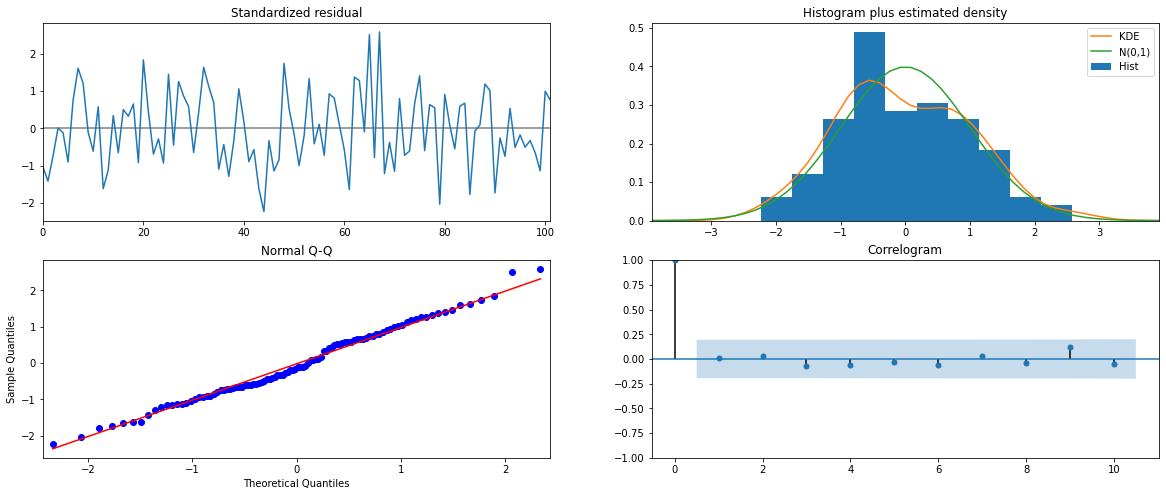

In [129]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [130]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [131]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.932129  13.877751      35.732237      90.132021
1  72.615141  14.088160      45.002854     100.227427
2  78.049008  14.142476      50.330264     105.767752
3  74.692525  14.144365      46.970078     102.414971
4  78.654822  14.149863      50.921600     106.388045

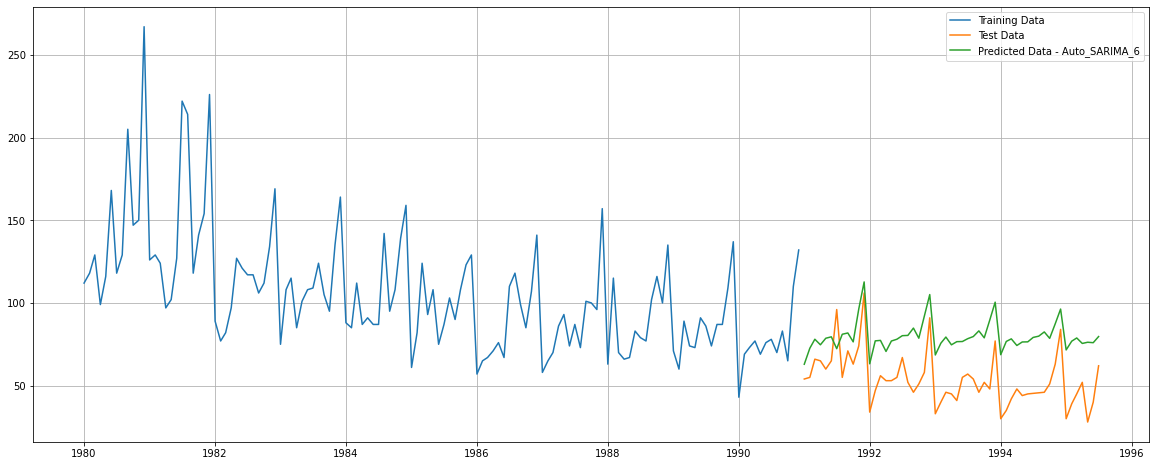

In [132]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean,label='Predicted Data - Auto_SARIMA_6')
plt.legend(loc='best')
plt.grid();

In [133]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
MAPE_auto_SARIMA_6 = MAPE(test['Rose'],predicted_auto_SARIMA_6.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_auto_SARIMA_6)

RMSE: 28.44974360398575
MAPE: 49.57


In [134]:
temp_resultsDf = pd.DataFrame({'Method': ['Auto_SARIMA(2,1,4)(4,0,4,6)'], 'RMSE': [rmse], 'MAPE':[MAPE_auto_SARIMA_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE    MAPE
0             RegressionOnTime  15.269000   22.82
0     RegressionOnTimeSeasonal  15.243000   22.73
0                  Naive_model  79.888000  145.79
0               Simple Average  53.636000   95.48
0        moving_avg_forecast_4  14.451000   19.49
0        moving_avg_forecast_6  14.566000   20.82
0        moving_avg_forecast_8  14.805000   21.06
0       moving_avg_forecast_12  15.236000   22.07
0                          SES  36.796250   63.88
0                  Holt_linear  70.572452  120.25
0                  Holt_Winter  16.447061   22.88
0                Holt_Winter M  17.369490   28.88
0            Auto_ARIMA(3,1,3)  15.985092   26.08
0          Manual_ARIMA(2,1,2)  15.354879   22.77
0  Auto_SARIMA(2,1,4)(4,0,4,6)  28.449744   49.57

#### We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Method 13: Auto SARIMA Model_12

Setting the seasonality as 12 for the first iteration of the auto SARIMA model.


In [135]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (1, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (2, 1, 4)(2, 0, 4, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)
Model: (3, 1, 4)(3, 0, 4, 12)
Model: (4, 1, 0)(4, 0, 0, 12)
Model: (4, 1, 1)(4, 0, 1, 12)
Model: (4, 1, 2)(4, 0, 2, 12)
Model: (4, 1, 3)(4, 0, 3, 12)
Model: (4, 1, 4)(4, 0, 4, 12)


In [136]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [137]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207293
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380891
SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:4021.6334362340194
SARIMA(0, 1, 0)x(0, 0, 4, 12)7 - AIC:763.996610478031
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869385456
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635753704
SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(1, 0, 4, 12)7 - AIC:737.7650770870825
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697587
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945787
SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:3685.8109990806747
SARIMA(0, 1, 0)x(2, 0, 4, 12)7 - AIC:737.7193836950797
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:851.7482702726041
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:850.5304136126601
SARIMA(0, 1, 0)x(3, 

SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:1094.3172708640866
SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:923.0862224063891
SARIMA(1, 1, 1)x(0, 0, 3, 12)7 - AIC:3912.7882294621377
SARIMA(1, 1, 1)x(0, 0, 4, 12)7 - AIC:715.3374505796212
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:1083.3937965030748
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7180547134399
SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:916.3549428510163
SARIMA(1, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(1, 1, 1)x(1, 0, 4, 12)7 - AIC:689.1226461353913
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:905.9249060841705
SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:907.2972867470746
SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:900.6725795936906
SARIMA(1, 1, 1)x(2, 0, 3, 12)7 - AIC:3521.6914176232203
SARIMA(1, 1, 1)x(2, 0, 4, 12)7 - AIC:687.7078507781818
SARIMA(1, 1, 1)x(3, 0, 0, 12)7 - AIC:789.23604393894
SARIMA(1, 1, 1)x(3, 0, 1, 12)7 - AIC:790.9603447845781
SARIMA(1, 1, 1)x(3, 0, 2, 12)7 - AIC:790.8113850275248
SARIMA(1, 1, 1)x(3, 0, 3, 12)7 - AIC:3553.128562078648
SARIMA(1, 1, 1)x(3, 0

SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1085.9643552598206
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:916.3258311104184
SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:3523.070942678949
SARIMA(2, 1, 2)x(0, 0, 4, 12)7 - AIC:710.9668251360858
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1073.2912713694834
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1044.1909353522165
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:907.6661488806137
SARIMA(2, 1, 2)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(2, 1, 2)x(1, 0, 4, 12)7 - AIC:685.6563290362951
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:897.3464441639431
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:898.3781891859337
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:890.6687981315235
SARIMA(2, 1, 2)x(2, 0, 3, 12)7 - AIC:3648.173135210298
SARIMA(2, 1, 2)x(2, 0, 4, 12)7 - AIC:684.7577564667442
SARIMA(2, 1, 2)x(3, 0, 0, 12)7 - AIC:785.1199712731169
SARIMA(2, 1, 2)x(3, 0, 1, 12)7 - AIC:786.9410035413073
SARIMA(2, 1, 2)x(3, 0, 2, 12)7 - AIC:786.964048610928
SARIMA(2, 1, 2)x(3, 0, 3, 12)7 - AIC:2708.5739355455576
SARIMA(2, 1, 2)x(3, 0

SARIMA(3, 1, 3)x(0, 0, 2, 12)7 - AIC:910.334017185272
SARIMA(3, 1, 3)x(0, 0, 3, 12)7 - AIC:3795.644897944065
SARIMA(3, 1, 3)x(0, 0, 4, 12)7 - AIC:706.2093319669345
SARIMA(3, 1, 3)x(1, 0, 0, 12)7 - AIC:1066.8458828482374
SARIMA(3, 1, 3)x(1, 0, 1, 12)7 - AIC:1039.766238010805
SARIMA(3, 1, 3)x(1, 0, 2, 12)7 - AIC:900.0483662957685
SARIMA(3, 1, 3)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 3)x(1, 0, 4, 12)7 - AIC:678.1354034729884
SARIMA(3, 1, 3)x(2, 0, 0, 12)7 - AIC:884.0463711772668
SARIMA(3, 1, 3)x(2, 0, 1, 12)7 - AIC:885.9217102796307
SARIMA(3, 1, 3)x(2, 0, 2, 12)7 - AIC:880.5595714918398
SARIMA(3, 1, 3)x(2, 0, 3, 12)7 - AIC:3589.6189985306696
SARIMA(3, 1, 3)x(2, 0, 4, 12)7 - AIC:679.0292008578356
SARIMA(3, 1, 3)x(3, 0, 0, 12)7 - AIC:775.5610185078609
SARIMA(3, 1, 3)x(3, 0, 1, 12)7 - AIC:776.369041450968
SARIMA(3, 1, 3)x(3, 0, 2, 12)7 - AIC:778.2316175090783
SARIMA(3, 1, 3)x(3, 0, 3, 12)7 - AIC:2759.353630434455
SARIMA(3, 1, 3)x(3, 0, 4, 12)7 - AIC:678.9743842884461
SARIMA(3, 1, 3)x(4, 0, 0

SARIMA(4, 1, 4)x(0, 0, 4, 12)7 - AIC:699.5486000945971
SARIMA(4, 1, 4)x(1, 0, 0, 12)7 - AIC:1054.0469920898672
SARIMA(4, 1, 4)x(1, 0, 1, 12)7 - AIC:1020.6942841887721
SARIMA(4, 1, 4)x(1, 0, 2, 12)7 - AIC:883.4529368680649
SARIMA(4, 1, 4)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(4, 1, 4)x(1, 0, 4, 12)7 - AIC:677.5799588783708
SARIMA(4, 1, 4)x(2, 0, 0, 12)7 - AIC:878.5951280447497
SARIMA(4, 1, 4)x(2, 0, 1, 12)7 - AIC:880.2758770906512
SARIMA(4, 1, 4)x(2, 0, 2, 12)7 - AIC:883.5569323439554
SARIMA(4, 1, 4)x(2, 0, 3, 12)7 - AIC:3514.251110460435
SARIMA(4, 1, 4)x(2, 0, 4, 12)7 - AIC:672.9657842258928
SARIMA(4, 1, 4)x(3, 0, 0, 12)7 - AIC:773.408864772593
SARIMA(4, 1, 4)x(3, 0, 1, 12)7 - AIC:768.4535722129071
SARIMA(4, 1, 4)x(3, 0, 2, 12)7 - AIC:769.916107313919
SARIMA(4, 1, 4)x(3, 0, 3, 12)7 - AIC:2846.809320196368
SARIMA(4, 1, 4)x(3, 0, 4, 12)7 - AIC:672.4888169357683
SARIMA(4, 1, 4)x(4, 0, 0, 12)7 - AIC:677.8215952931114
SARIMA(4, 1, 4)x(4, 0, 1, 12)7 - AIC:677.2262826428582
SARIMA(4, 1, 4)x(4, 0, 2

In [138]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
499  (3, 1, 4)  (4, 0, 4, 12)  667.307014
374  (2, 1, 4)  (4, 0, 4, 12)  667.677140
244  (1, 1, 4)  (3, 0, 4, 12)  668.899289
624  (4, 1, 4)  (4, 0, 4, 12)  669.285928
109  (0, 1, 4)  (1, 0, 4, 12)  669.898798

In [141]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 4),
                                seasonal_order=(4, 0, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 4)x(4, 0, 4, 12)   Log Likelihood                -317.654
Date:                            Sun, 13 Sep 2020   AIC                            667.307
Time:                                    19:15:00   BIC                            705.014
Sample:                                         0   HQIC                           682.402
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7519      0.256     -6.851      0.000      -2.253      -1.251
ar.L2         -1.6381      0.315   

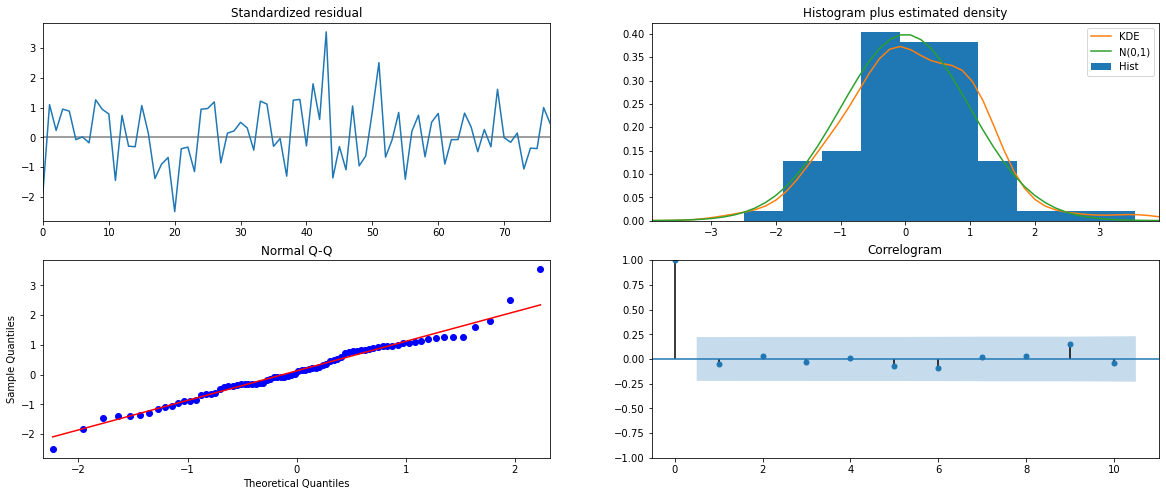

In [142]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [143]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [144]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  47.462634  12.333608      23.289206      71.636062
1  58.245592  12.076049      34.576971      81.914214
2  80.106154  12.140667      56.310883     103.901425
3  72.308029  12.136516      48.520895      96.095164
4  75.676275  12.156247      51.850468      99.502082

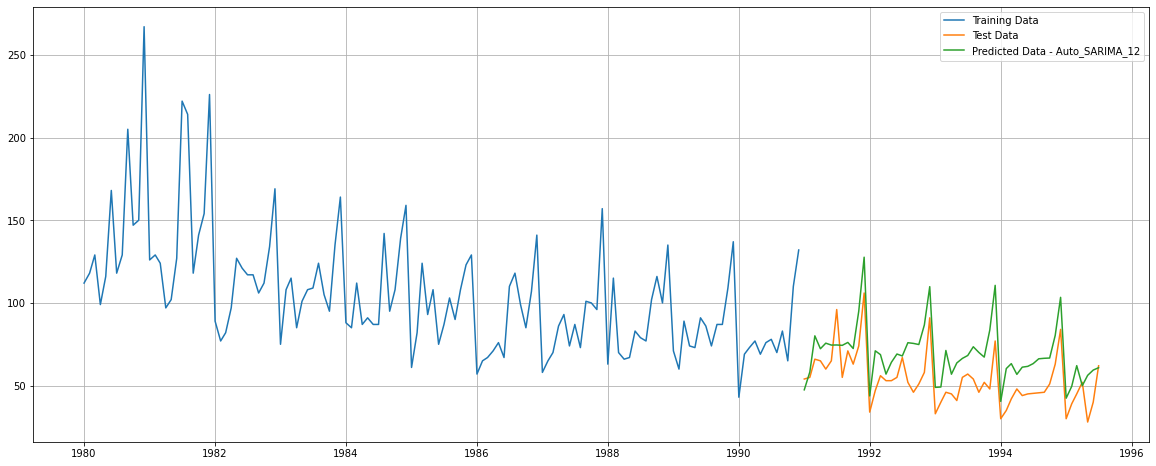

In [145]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted Data - Auto_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [146]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
MAPE_auto_SARIMA_12 = MAPE(test['Rose'],predicted_auto_SARIMA_12.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_auto_SARIMA_12)


RMSE: 18.110420326283407
MAPE: 30.18


In [147]:
temp_resultsDf = pd.DataFrame({'Method':['Auto_SARIMA(3,1,4)(4,0,4,12)'],'RMSE': [rmse],'MAPE':[MAPE_auto_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE    MAPE
0              RegressionOnTime  15.269000   22.82
0      RegressionOnTimeSeasonal  15.243000   22.73
0                   Naive_model  79.888000  145.79
0                Simple Average  53.636000   95.48
0         moving_avg_forecast_4  14.451000   19.49
0         moving_avg_forecast_6  14.566000   20.82
0         moving_avg_forecast_8  14.805000   21.06
0        moving_avg_forecast_12  15.236000   22.07
0                           SES  36.796250   63.88
0                   Holt_linear  70.572452  120.25
0                   Holt_Winter  16.447061   22.88
0                 Holt_Winter M  17.369490   28.88
0             Auto_ARIMA(3,1,3)  15.985092   26.08
0           Manual_ARIMA(2,1,2)  15.354879   22.77
0   Auto_SARIMA(2,1,4)(4,0,4,6)  28.449744   49.57
0  Auto_SARIMA(3,1,4)(4,0,4,12)  18.110420   30.18

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

### Method 14: Manual SARIMA model_6

Let us look at the ACF and the PACF plots once more.

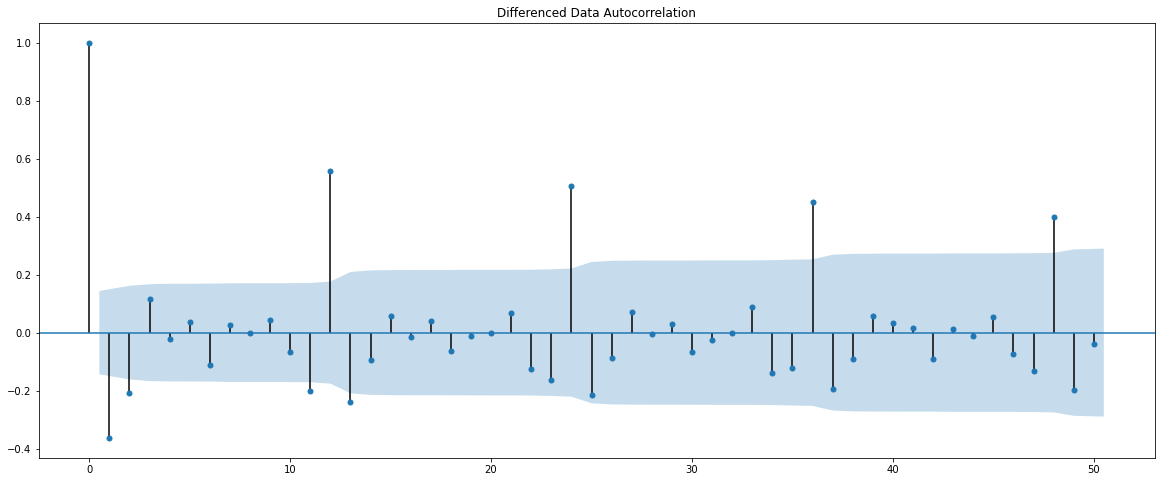

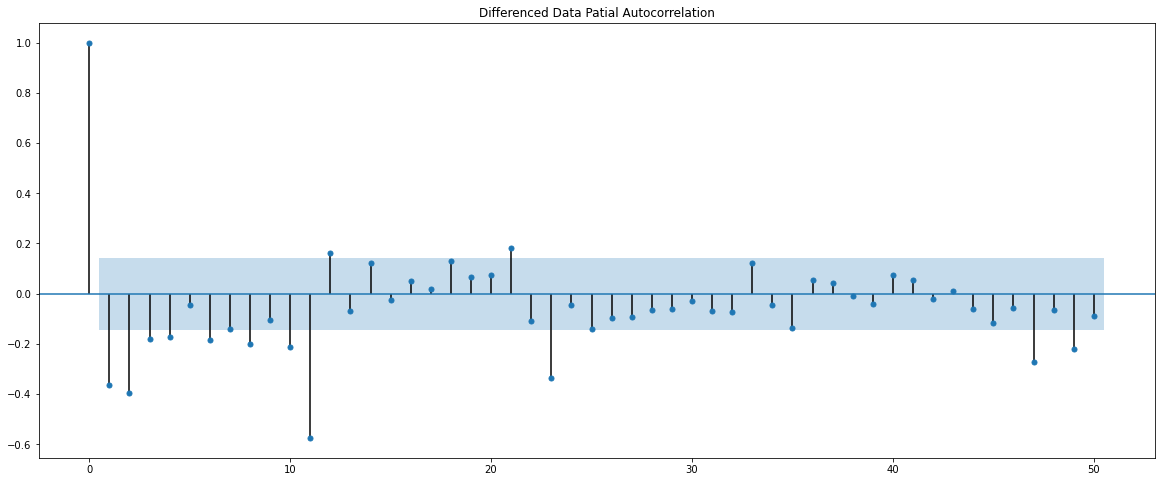

In [148]:
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

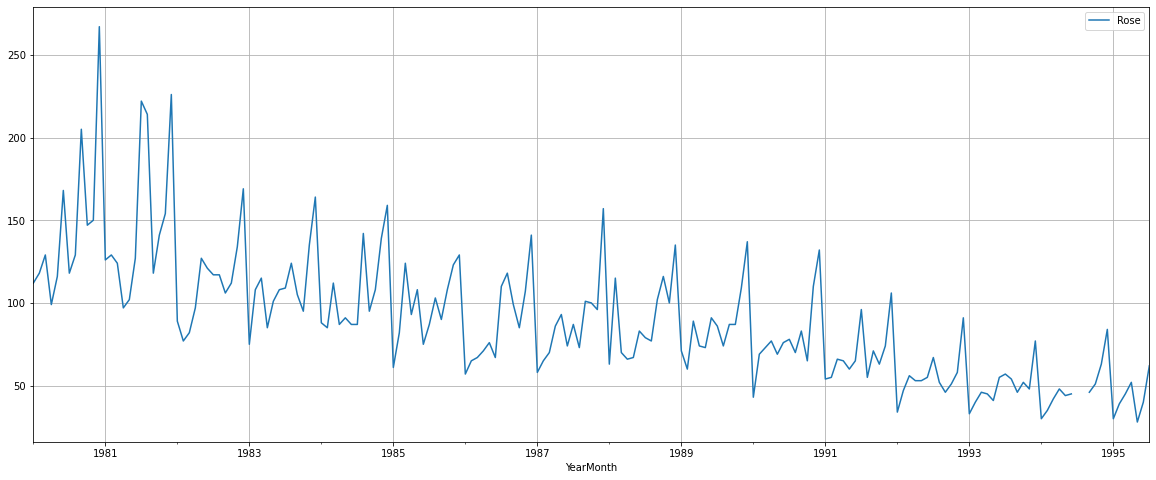

In [149]:
df.plot()
plt.grid();

We see that there is a slight trend and a seasonality. So, now we take a seasonal differencing and check the series.

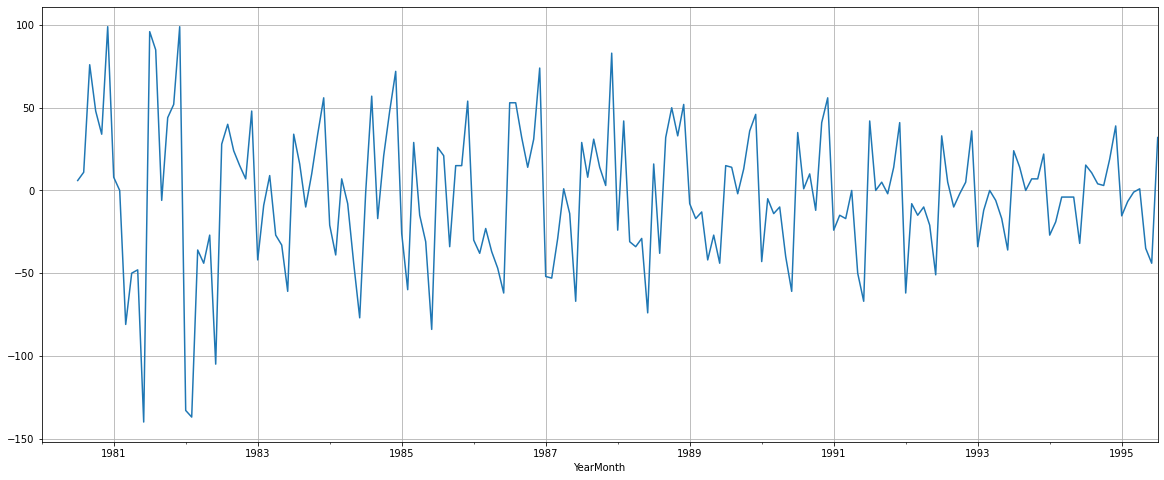

In [150]:
(df_imputed['Rose'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

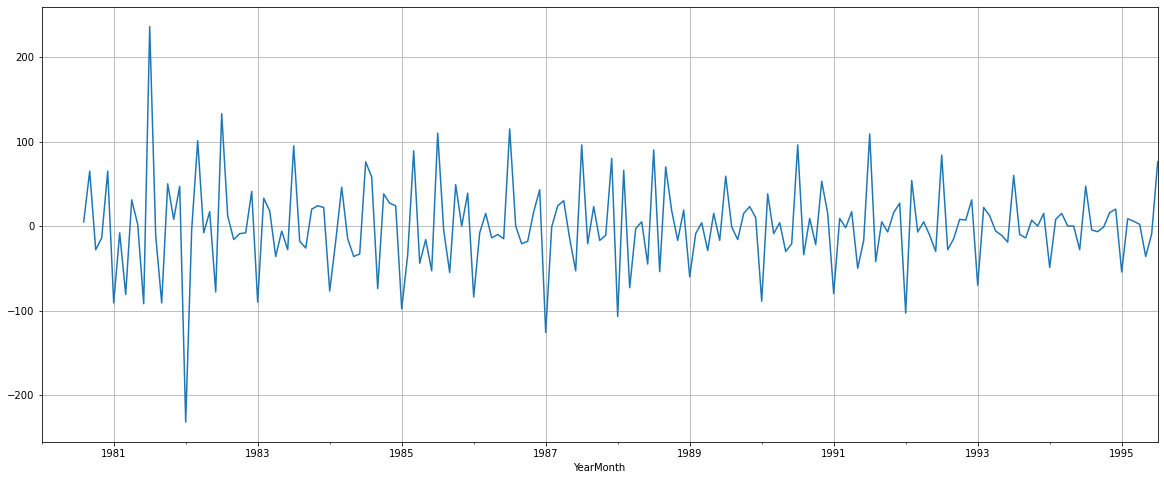

In [151]:
(df_imputed['Rose'].diff(6)).diff().plot()
plt.grid();

#### Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

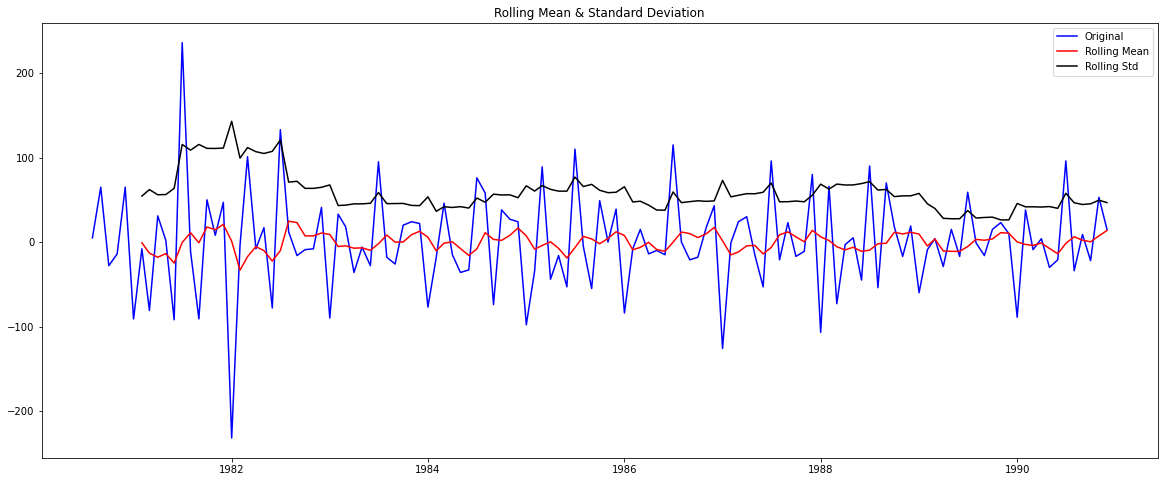

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [152]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

#### Checking the ACF and the PACF plots for the new modified Time Series.

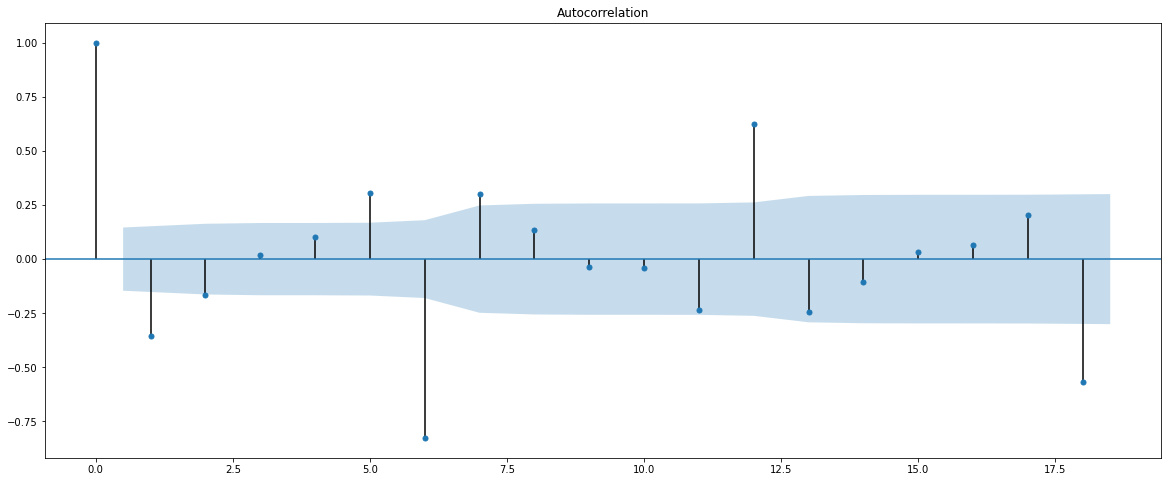

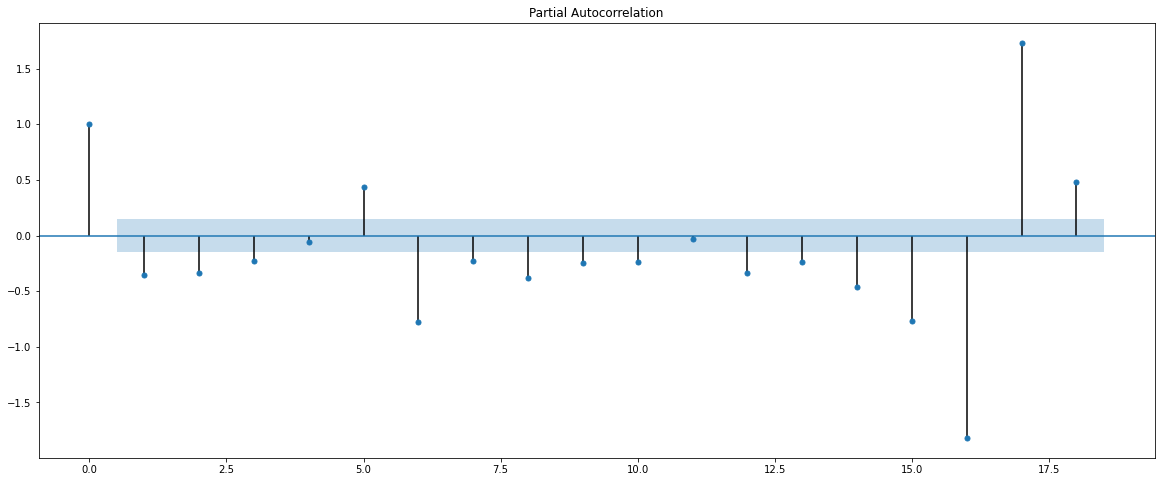

In [153]:
plot_acf((df_imputed['Rose'].diff(6).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df_imputed['Rose'].diff(6).dropna()).diff(1).dropna(),lags=18);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(4) and q(2) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the lag at which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0. 
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

In [154]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(2, 1, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                          SARIMAX Results                                           
Dep. Variable:                                            y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(2, 1, [1, 2, 3, 4], 6)   Log Likelihood                -417.602
Date:                                      Sun, 13 Sep 2020   AIC                            857.205
Time:                                              19:15:34   BIC                            885.751
Sample:                                                   0   HQIC                           868.755
                                                      - 132                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1304      0.130  

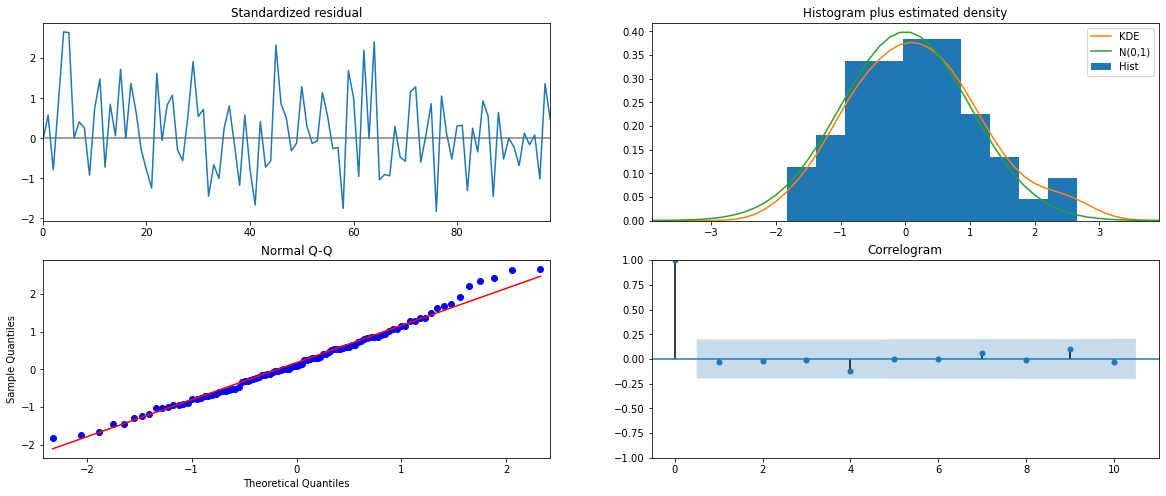

In [155]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

### Predict on the Test Set using this model and evaluate the model.

In [156]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [157]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  54.118340  16.079116      22.603852      85.632828
1  61.107858  16.785490      28.208901      94.006815
2  71.101034  17.189900      37.409449     104.792619
3  70.354946  17.207254      36.629347     104.080544
4  71.938689  17.340663      37.951615     105.925763

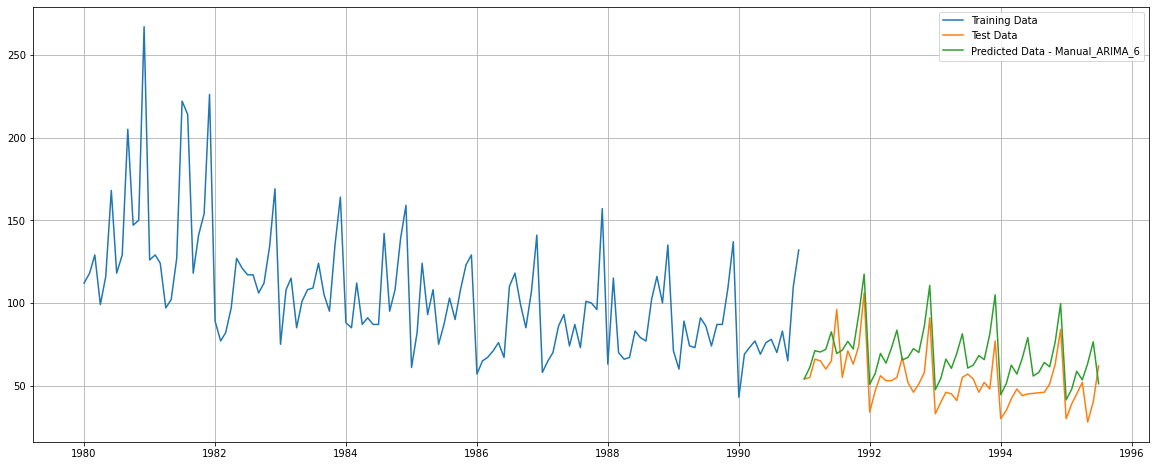

In [158]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_6.predicted_mean,label='Predicted Data - Manual_ARIMA_6')
plt.legend(loc='best')
plt.grid();

In [159]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
MAPE_manual_SARIMA_6 = MAPE(test['Rose'],predicted_manual_SARIMA_6.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_manual_SARIMA_6)

RMSE: 18.359456265306047
MAPE: 29.95


In [160]:
temp_resultsDf = pd.DataFrame({'Method':['Manual_SARIMA(3,1,1)(2,1,4,6)'],'RMSE': [rmse],'MAPE':[MAPE_manual_SARIMA_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE    MAPE
0               RegressionOnTime  15.269000   22.82
0       RegressionOnTimeSeasonal  15.243000   22.73
0                    Naive_model  79.888000  145.79
0                 Simple Average  53.636000   95.48
0          moving_avg_forecast_4  14.451000   19.49
0          moving_avg_forecast_6  14.566000   20.82
0          moving_avg_forecast_8  14.805000   21.06
0         moving_avg_forecast_12  15.236000   22.07
0                            SES  36.796250   63.88
0                    Holt_linear  70.572452  120.25
0                    Holt_Winter  16.447061   22.88
0                  Holt_Winter M  17.369490   28.88
0              Auto_ARIMA(3,1,3)  15.985092   26.08
0            Manual_ARIMA(2,1,2)  15.354879   22.77
0    Auto_SARIMA(2,1,4)(4,0,4,6)  28.449744   49.57
0   Auto_SARIMA(3,1,4)(4,0,4,12)  18.110420   30.18
0  Manual_SARIMA(3,1,1)(2,1,4,6)  18.359456   29.95

### Method 15: Manual SARIMA model_12

Let us look at the ACF and the PACF plots once more.

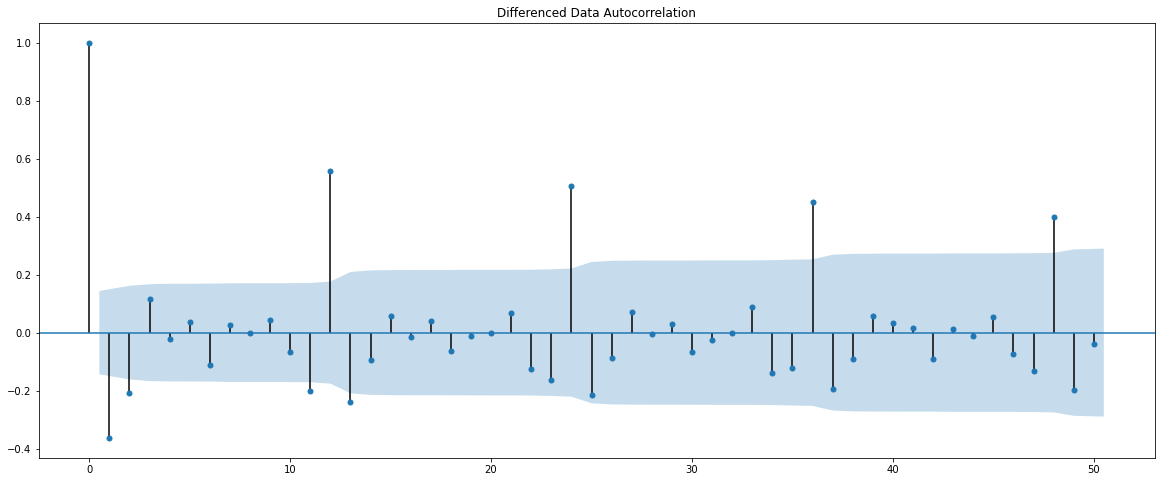

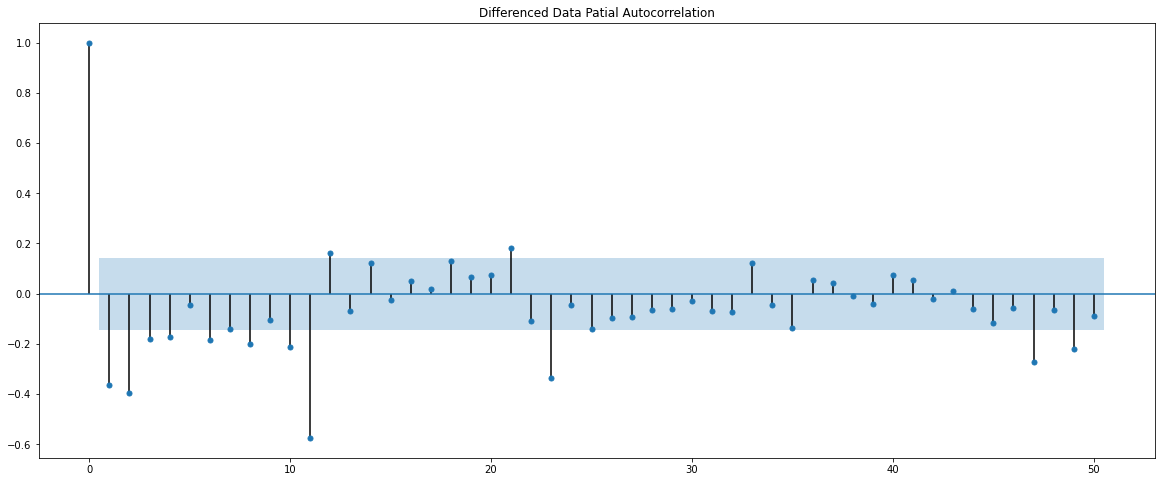

In [161]:
plot_acf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_imputed['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

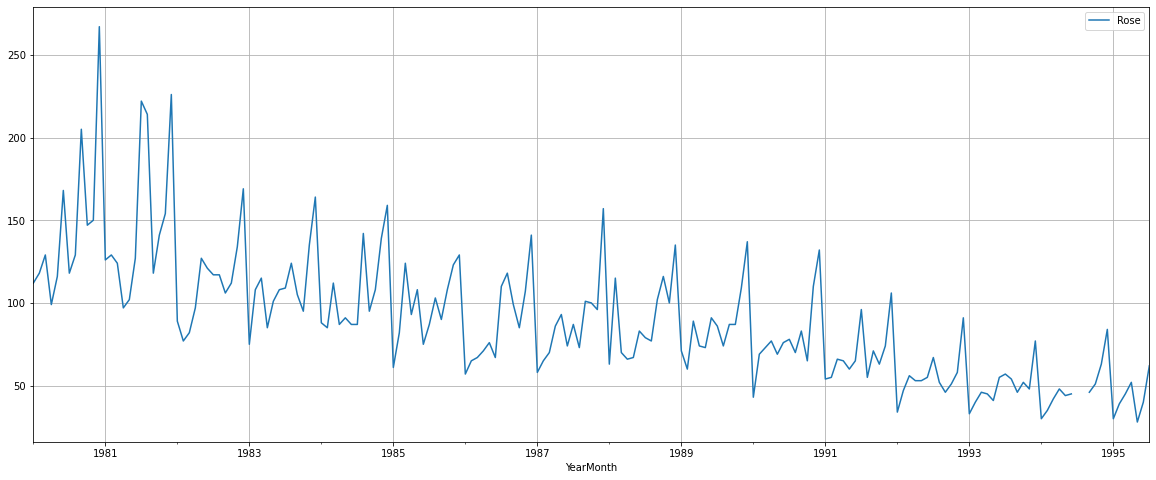

In [162]:
df.plot()
plt.grid();

We see that there is a slight trend and a seasonality. So, now we take a seasonal differencing and check the series.

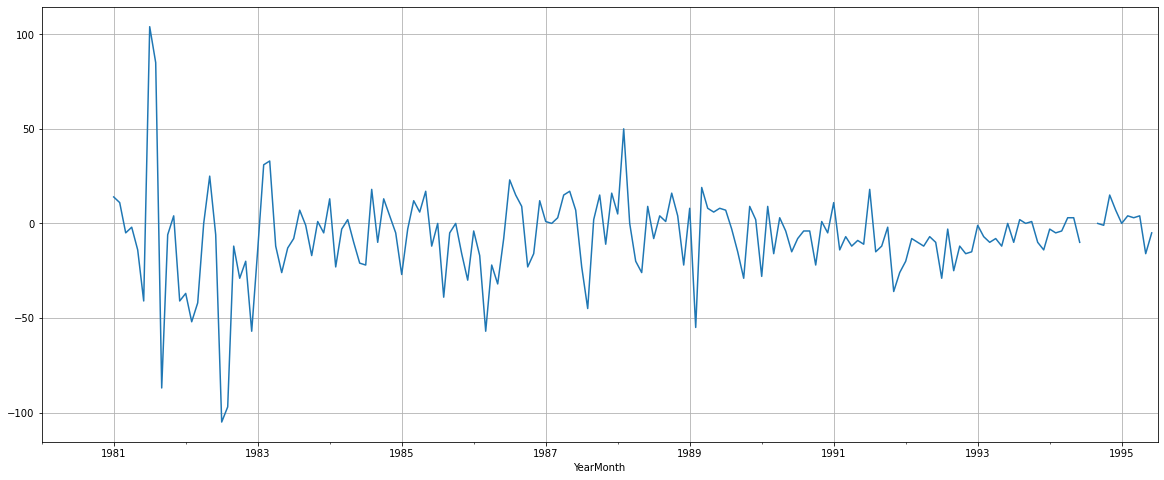

In [163]:
(df['Rose'].diff(12)).plot()
plt.grid();

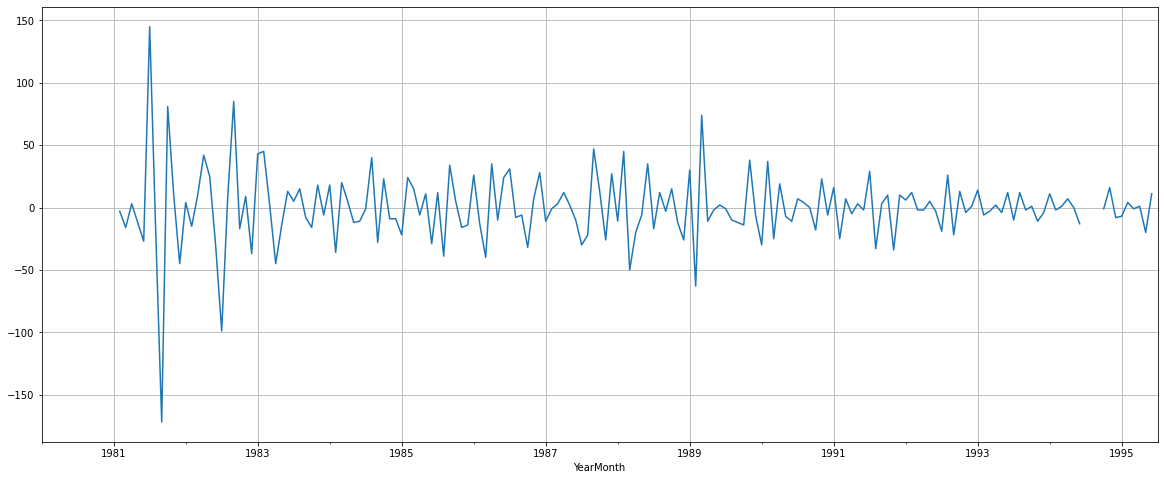

In [164]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

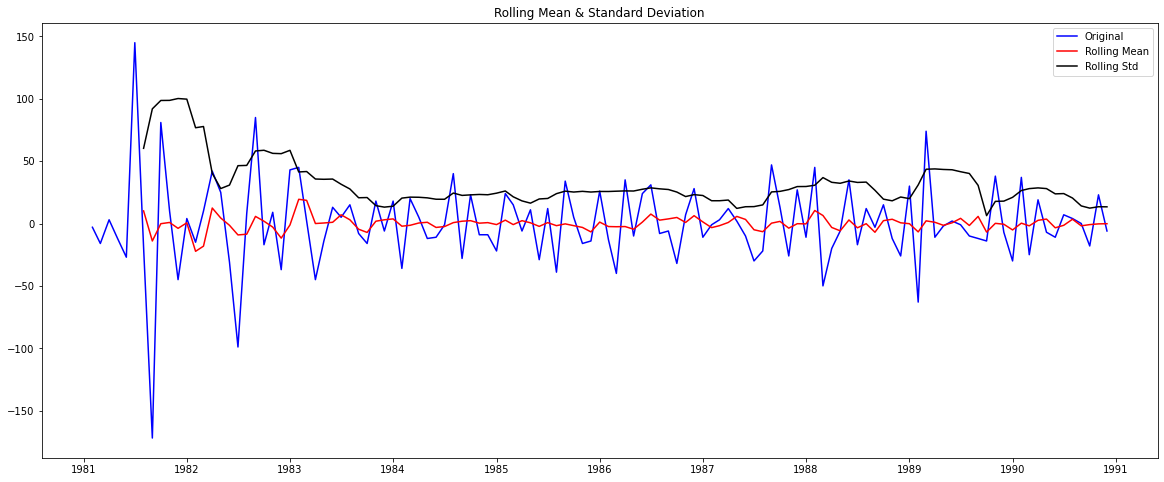

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [165]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

#### Checking the ACF and the PACF plots for the new modified Time Series.

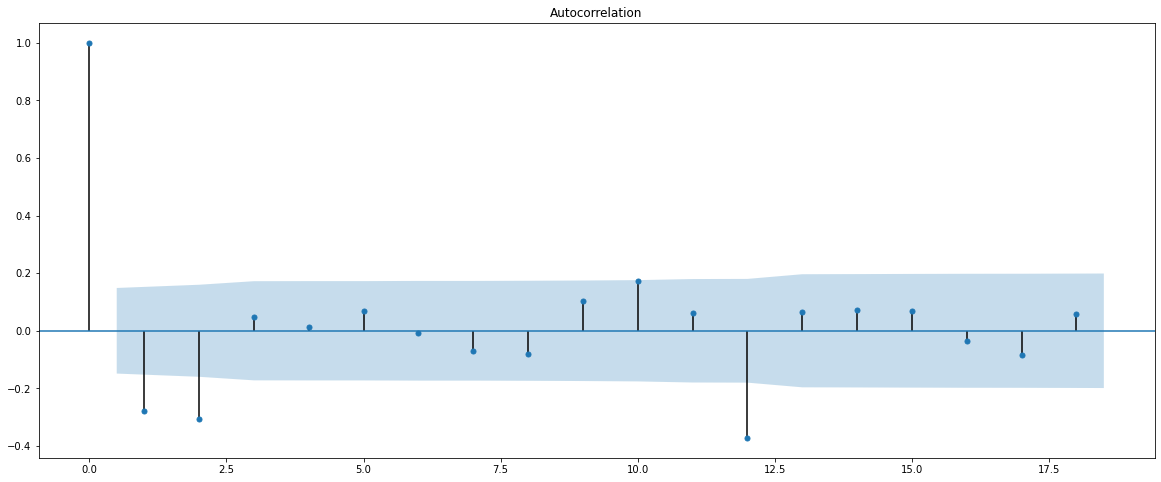

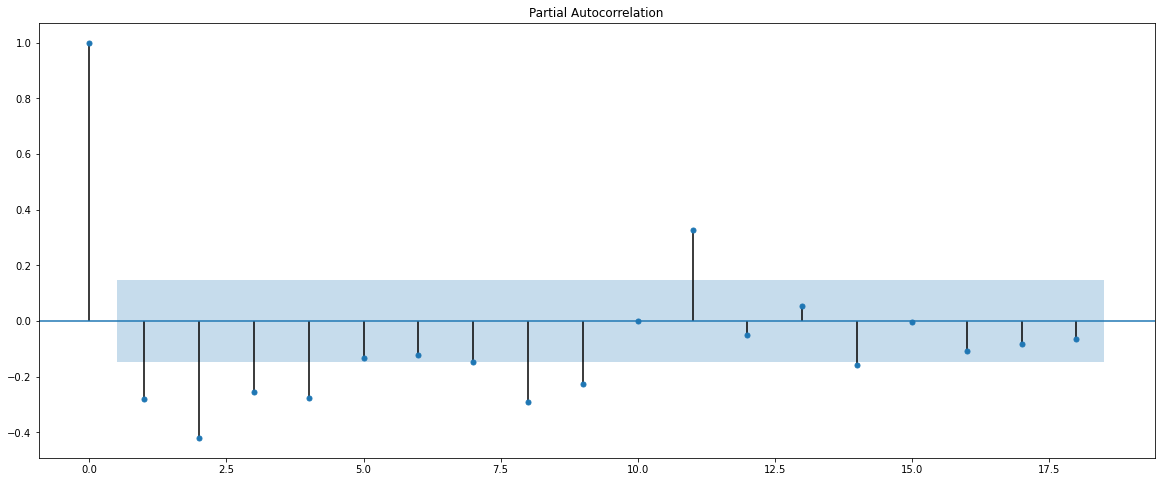

In [166]:
plot_acf((df_imputed['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df_imputed['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18);

#### Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the p(4) and q(2) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the lag at which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0. 
Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

In [167]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -284.472
Date:                            Sun, 13 Sep 2020   AIC                            590.945
Time:                                    19:16:23   BIC                            615.520
Sample:                                         0   HQIC                           600.695
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9797      0.225     -4.364      0.000      -1.420      -0.540
ar.L2         -0.1273      0.143   

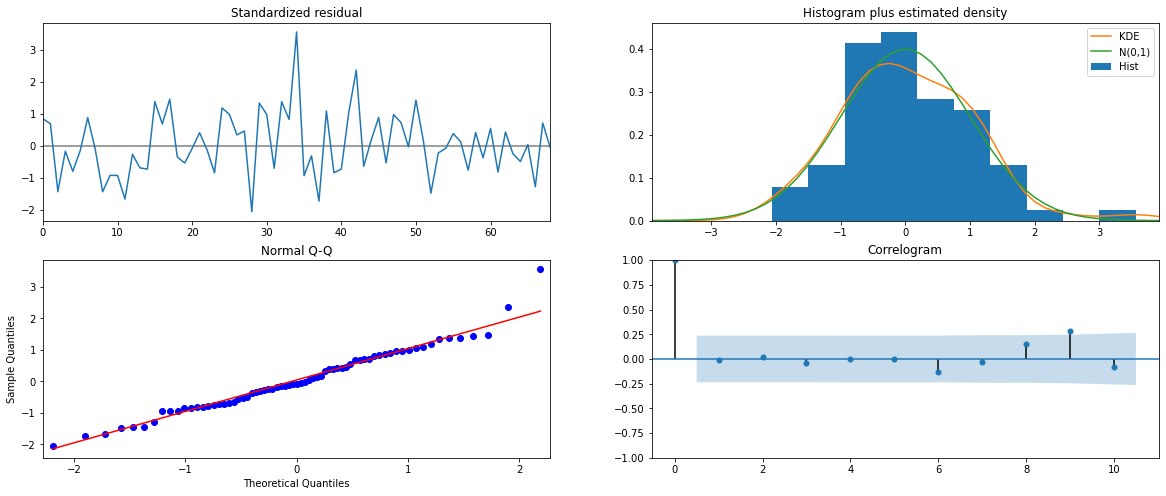

In [168]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

### Predict on the Test Set using this model and evaluate the model.

In [169]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [170]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  43.921079  14.047828      16.387843      71.454315
1  72.281238  14.056976      44.730070      99.832405
2  63.965386  14.046850      36.434066      91.496705
3  60.129096  14.230299      32.238221      88.019970
4  61.354560  14.221042      33.481830      89.227289

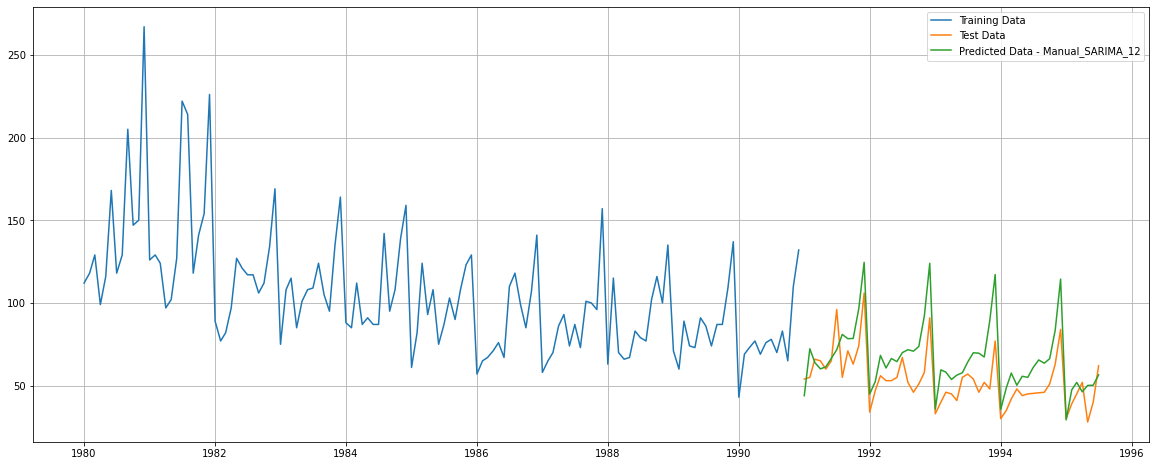

In [171]:
plt.plot(train['Rose'],label='Training Data')
plt.plot(test['Rose'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_12.predicted_mean,label='Predicted Data - Manual_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [172]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
MAPE_manual_SARIMA_12 = MAPE(test['Rose'],predicted_manual_SARIMA_12.predicted_mean)
print('RMSE:',rmse)
print('MAPE:',MAPE_manual_SARIMA_12)

RMSE: 17.341982602331946
MAPE: 26.69


### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

### Mean Absolute Percentage Error:
- This is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management,  [0,+∞) 
- MAPE=100n∑i=1n|yi−y^i|yi

In [173]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_SARIMA(2,1,2)(4,1,2,12)'],'RMSE': [rmse],'MAPE':[MAPE_manual_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE    MAPE
0                RegressionOnTime  15.269000   22.82
0        RegressionOnTimeSeasonal  15.243000   22.73
0                     Naive_model  79.888000  145.79
0                  Simple Average  53.636000   95.48
0           moving_avg_forecast_4  14.451000   19.49
0           moving_avg_forecast_6  14.566000   20.82
0           moving_avg_forecast_8  14.805000   21.06
0          moving_avg_forecast_12  15.236000   22.07
0                             SES  36.796250   63.88
0                     Holt_linear  70.572452  120.25
0                     Holt_Winter  16.447061   22.88
0                   Holt_Winter M  17.369490   28.88
0               Auto_ARIMA(3,1,3)  15.985092   26.08
0             Manual_ARIMA(2,1,2)  15.354879   22.77
0     Auto_SARIMA(2,1,4)(4,0,4,6)  28.449744   49.57
0    Auto_SARIMA(3,1,4)(4,0,4,12)  18.110420   30.18
0   Manual_SARIMA(3,1,1)(2,1,4,6)  18.359456   29.95
0  Manual_SARIMA(2,1,2)(4,1,2,12)  17.341983   26.69

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Building the most optimum model on the Full Data.

### Model 1

In [174]:
full_data_model = sm.tsa.statespace.SARIMAX(df_imputed['Rose'],
                                order=(2,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -492.373
Date:                            Sun, 13 Sep 2020   AIC                           1006.747
Time:                                    19:17:40   BIC                           1037.770
Sample:                                01-01-1980   HQIC                          1019.349
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0122      0.104      9.702      0.000       0.808       1.217
ar.L2         -0.1787      0.110   

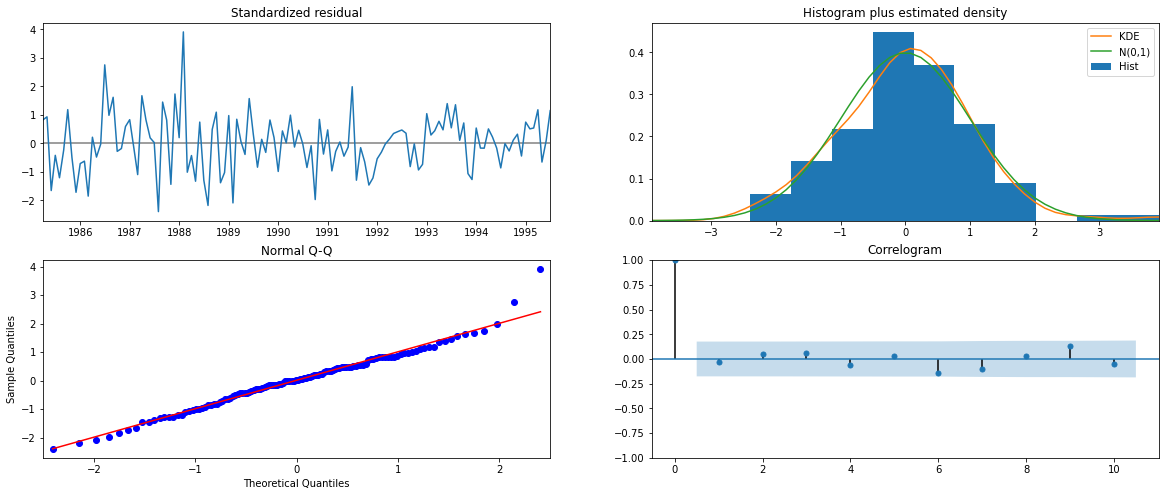

In [175]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [176]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [177]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head(12)

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  42.882449  12.307073      18.761030      67.003868
1995-09-01  43.830453  12.339931      19.644632      68.016274
1995-10-01  46.343647  12.356903      22.124563      70.562732
1995-11-01  59.105613  12.358431      34.883534      83.327693
1995-12-01  87.922373  12.366062      63.685337     112.159408
1996-01-01  26.195641  12.414435       1.863795      50.527488
1996-02-01  35.192859  12.518705      10.656647      59.729070
1996-03-01  42.855579  12.682835      17.997679      67.713479
1996-04-01  45.031205  12.901380      19.744966      70.317445
1996-05-01  36.887220  13.165315      11.083677      62.690762
1996-06-01  44.290399  13.465051      17.899384      70.681414
1996-07-01  56.466726  13.791683      29.435524      83.497928

In [178]:
rmse = mean_squared_error(df_imputed['Rose'],results_full_data_model.fittedvalues,squared=False)
MAPE_fulldata_SARIMA_12 = MAPE(df_imputed['Rose'],results_full_data_model.fittedvalues)
print('RMSE of the Full Model',rmse)
print('MAPE of manual_SARIMA_12_full_data:',MAPE_fulldata_SARIMA_12)

RMSE of the Full Model 44.36606531680903
MAPE of manual_SARIMA_12_full_data: 27.74


In [179]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

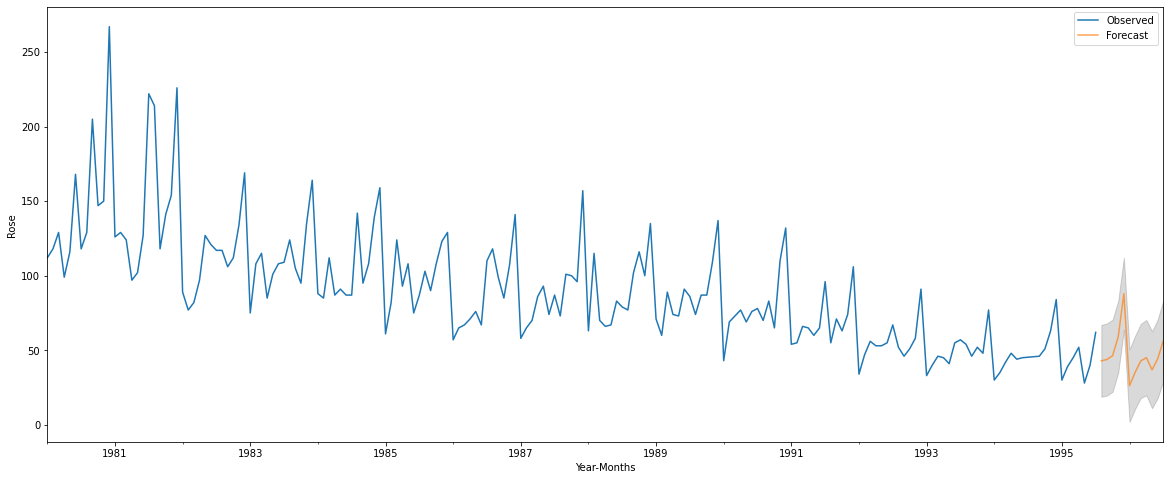

In [180]:
# plot the forecast along with the confidence band

axis = df_imputed['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

#### We see that we have certainly been able to take advantage of seasonality to get a better prediction with thinner confidence intervals. We saw that differencing on the seasonal scale helped make the model more accurate on the test data.

In [181]:
temp_resultsDf = pd.DataFrame({'Method':['Fulldata_Manual_SARIMA(2,1,2)(4,1,2,12)'],'RMSE': [rmse], 'MAPE':[MAPE_fulldata_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE    MAPE
0                         RegressionOnTime  15.269000   22.82
0                 RegressionOnTimeSeasonal  15.243000   22.73
0                              Naive_model  79.888000  145.79
0                           Simple Average  53.636000   95.48
0                    moving_avg_forecast_4  14.451000   19.49
0                    moving_avg_forecast_6  14.566000   20.82
0                    moving_avg_forecast_8  14.805000   21.06
0                   moving_avg_forecast_12  15.236000   22.07
0                                      SES  36.796250   63.88
0                              Holt_linear  70.572452  120.25
0                              Holt_Winter  16.447061   22.88
0                            Holt_Winter M  17.369490   28.88
0                        Auto_ARIMA(3,1,3)  15.985092   26.08
0                      Manual_ARIMA(2,1,2)  15.354879   22.77
0              Auto_SARIMA(2,1,4)(4,0,4,6)  28.449744   49.57
0             Auto_SARIMA(3,1,4)(4,0,4,12)  18.110420   30.18
0            Manual_SARIMA(3,1,1)(2,1,4,6)  18.359456   29.95
0           Manual_SARIMA(2,1,2)(4,1,2,12)  17.341983   26.69
0  Fulldata_Manual_SARIMA(2,1,2)(4,1,2,12)  44.366065   27.74

### Inference
As of now, we observe that Manual_SARIMA (2,1,2)(4,1,2,12) seems to be a good fit for the data, since the RMSE (17.34) value and MAPE (26.69) respectively is low compared to other models. From the graph we can see the prediction is also similar to the test data.

### Model 2

In [182]:
full_data_model = sm.tsa.statespace.SARIMAX(df_imputed['Rose'],
                                order=(2,1,4),
                                seasonal_order=(4, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 4)x(4, 0, 4, 6)   Log Likelihood                -623.724
Date:                           Sun, 13 Sep 2020   AIC                           1277.448
Time:                                   21:32:04   BIC                           1323.291
Sample:                               01-01-1980   HQIC                          1296.066
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5563      0.019     82.962      0.000       1.520       1.593
ar.L2         -0.9345      0.018    -51.226

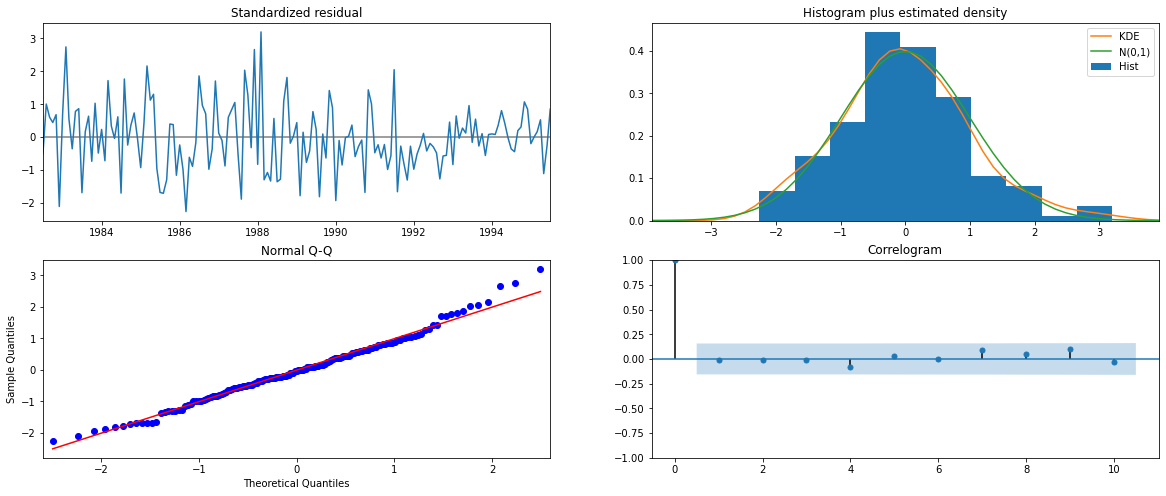

In [183]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [184]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [185]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head(12)

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  46.744334  12.221744      22.790156      70.698511
1995-09-01  45.687710  12.253168      21.671941      69.703479
1995-10-01  49.858260  12.303255      25.744325      73.972196
1995-11-01  53.695494  12.392146      29.407334      77.983654
1995-12-01  70.237812  12.529089      45.681249      94.794374
1996-01-01  33.353954  12.698892       8.464584      58.243325
1996-02-01  37.567127  12.863591      12.354952      62.779302
1996-03-01  45.540354  12.997603      20.065520      71.015187
1996-04-01  47.728126  13.089603      22.072975      73.383277
1996-05-01  40.443890  13.148067      14.674151      66.213628
1996-06-01  41.160399  13.190582      15.307332      67.013465
1996-07-01  50.317624  13.233754      24.379942      76.255306

In [186]:
rmse = mean_squared_error(df_imputed['Rose'],results_full_data_model.fittedvalues,squared=False)
MAPE_fulldata_SARIMA_12 = MAPE(df_imputed['Rose'],results_full_data_model.fittedvalues)
print('RMSE of the Full Model',rmse)
print('MAPE of manual_SARIMA_12_full_data:',MAPE_fulldata_SARIMA_12)

RMSE of the Full Model 54.641890046259874
MAPE of manual_SARIMA_12_full_data: 28.42


In [187]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

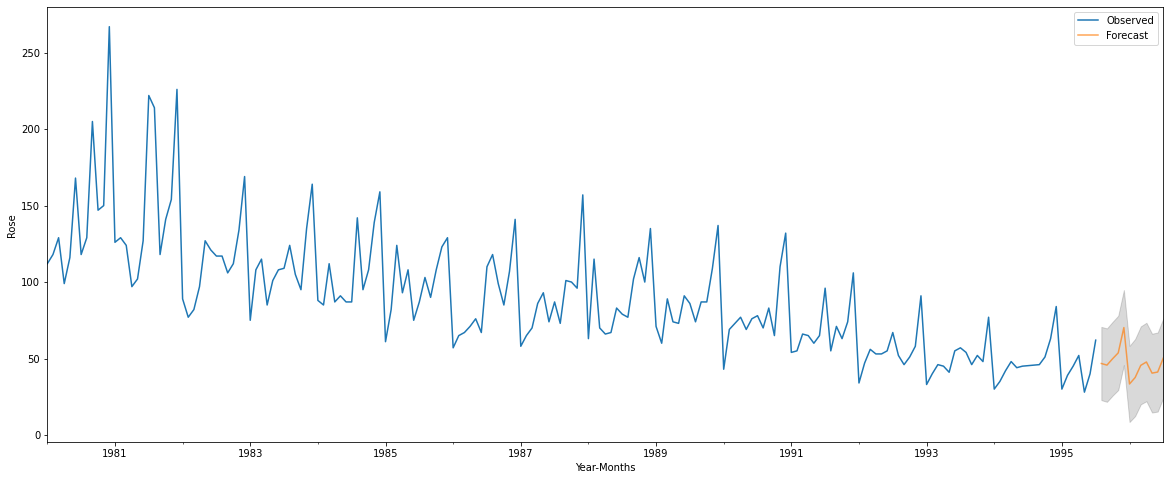

In [188]:
# plot the forecast along with the confidence band

axis = df_imputed['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

#### We see that we have certainly been able to take advantage of seasonality to get a better prediction with thinner confidence intervals. We saw that differencing on the seasonal scale helped make the model more accurate on the test data.

In [189]:
temp_resultsDf = pd.DataFrame({'Method':['Fulldata_Manual_SARIMA(2,1,4)(4,0,4,6)'],'RMSE': [rmse], 'MAPE':[MAPE_fulldata_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method       RMSE    MAPE
0                         RegressionOnTime  15.269000   22.82
0                 RegressionOnTimeSeasonal  15.243000   22.73
0                              Naive_model  79.888000  145.79
0                           Simple Average  53.636000   95.48
0                    moving_avg_forecast_4  14.451000   19.49
0                    moving_avg_forecast_6  14.566000   20.82
0                    moving_avg_forecast_8  14.805000   21.06
0                   moving_avg_forecast_12  15.236000   22.07
0                                      SES  36.796250   63.88
0                              Holt_linear  70.572452  120.25
0                              Holt_Winter  16.447061   22.88
0                            Holt_Winter M  17.369490   28.88
0                        Auto_ARIMA(3,1,3)  15.985092   26.08
0                      Manual_ARIMA(2,1,2)  15.354879   22.77
0              Auto_SARIMA(2,1,4)(4,0,4,6)  28.449744   49.57
0             Auto_SARIMA(3,1,4)(4,0,4,12)  18.110420   30.18
0            Manual_SARIMA(3,1,1)(2,1,4,6)  18.359456   29.95
0           Manual_SARIMA(2,1,2)(4,1,2,12)  17.341983   26.69
0  Fulldata_Manual_SARIMA(2,1,2)(4,1,2,12)  44.366065   27.74
0   Fulldata_Manual_SARIMA(2,1,4)(4,0,4,6)  54.641890   28.42

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Comment on our Final Model (Manual_SARIMA(2,1,4)(4,0,4,6))
The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we’ll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, approx. 8 weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behaviour.
Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:
- In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

- Measures that the company should be taking for future sales.

Wine selections on the menu should include more than the region of origin, the type and the year. Select words like fruity, bold, earthy, light, sweet, dry and dessert to describe the actual taste. It will help customers narrow the options and increase sales. Try giving your customers opportunities to try selections with these simple strategies:
Open up the bar for tasting events. You don't have to offer samples of every wine, but occasionally opening up the bar for a wine tasting or wine pairing event can bring in customers on a slow night.
Bring in a few bottles of something new every month. Promote these selections to your email list. Invite them in for a special glass of your featured wine.
Always have a featured wine. Pair it with a signature or special dish and make it a special for the week or month. Don’t forget to share it with your customers on Facebook.

### The End